# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [190]:
import warnings
warnings.filterwarnings("ignore")

In [192]:
# Import essential libraries for data manipulation and analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [195]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [199]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

In [201]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [203]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [208]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [210]:
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [212]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))
df.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [216]:
# Calculate time taken in minutes
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_duration  
0                      21.0     34.44               47.0  
1                       2.0     27.60               44.0  
2                      18.0     11.56               55.0  
3                       8.0     31.80               59.0  
4                       7.0      8.20               46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [221]:
# Extract the hour and day of week from the 'created_at' timestamp

# Extract hour of order placement
df['order_hour'] = df['created_at'].dt.hour

# Extract day of the week (0 = Monday, 6 = Sunday)
df['order_day'] = df['created_at'].dt.dayofweek

# Display first few rows to verify
df[['delivery_duration', 'order_hour', 'order_day']].head()


delivery_duration  order_hour  order_day
0               47.0          22          4
1               44.0          21          1
2               55.0           0          0
3               59.0           3          3
4               46.0           2          1

In [225]:
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day'].apply(lambda x: 1 if x >= 5 else 0)

# Convert to category type for efficiency
df['isWeekend'] = df['isWeekend'].astype('category')
df['order_day'] = df['order_day'].astype('category')
# Verify changes
df[['order_day', 'isWeekend']].head(10)

order_day isWeekend
0         4         0
1         1         0
2         0         0
3         3         0
4         1         0
5         4         0
6         6         1
7         5         1
8         5         1
9         5         1

In [227]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_duration  order_hour  \
0                      21.0     34.44               47.0          22   
1                       2.0     27.60               44.0          21   
2                      18.0     11.56               55.0           0   
3                       8.0     31.80               59.0           3   
4                       7.0      8.20               46.0           2   

  order_day isWeekend  
0         4         0  
1         1         0  
2         0         0  
3         3         0  
4         1         0

In [229]:
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  delivery_duration         175777 non-null  float64 
 13  order_hour                175

In [235]:
# Define target variable (y) and features (X)
# Define target variable (y) - predicting delivery duration
y = df['delivery_duration']

# Define input features (X) - all other relevant features except target
X = df.drop(columns=['delivery_duration'])

# Verify shapes
X.shape, y.shape

((175777, 15), (175777,))

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [238]:
from sklearn.model_selection import train_test_split

In [240]:
# Split data into training and testing sets
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140621, 15), (35156, 15), (140621,), (35156,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [244]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

# Print results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'order_day', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

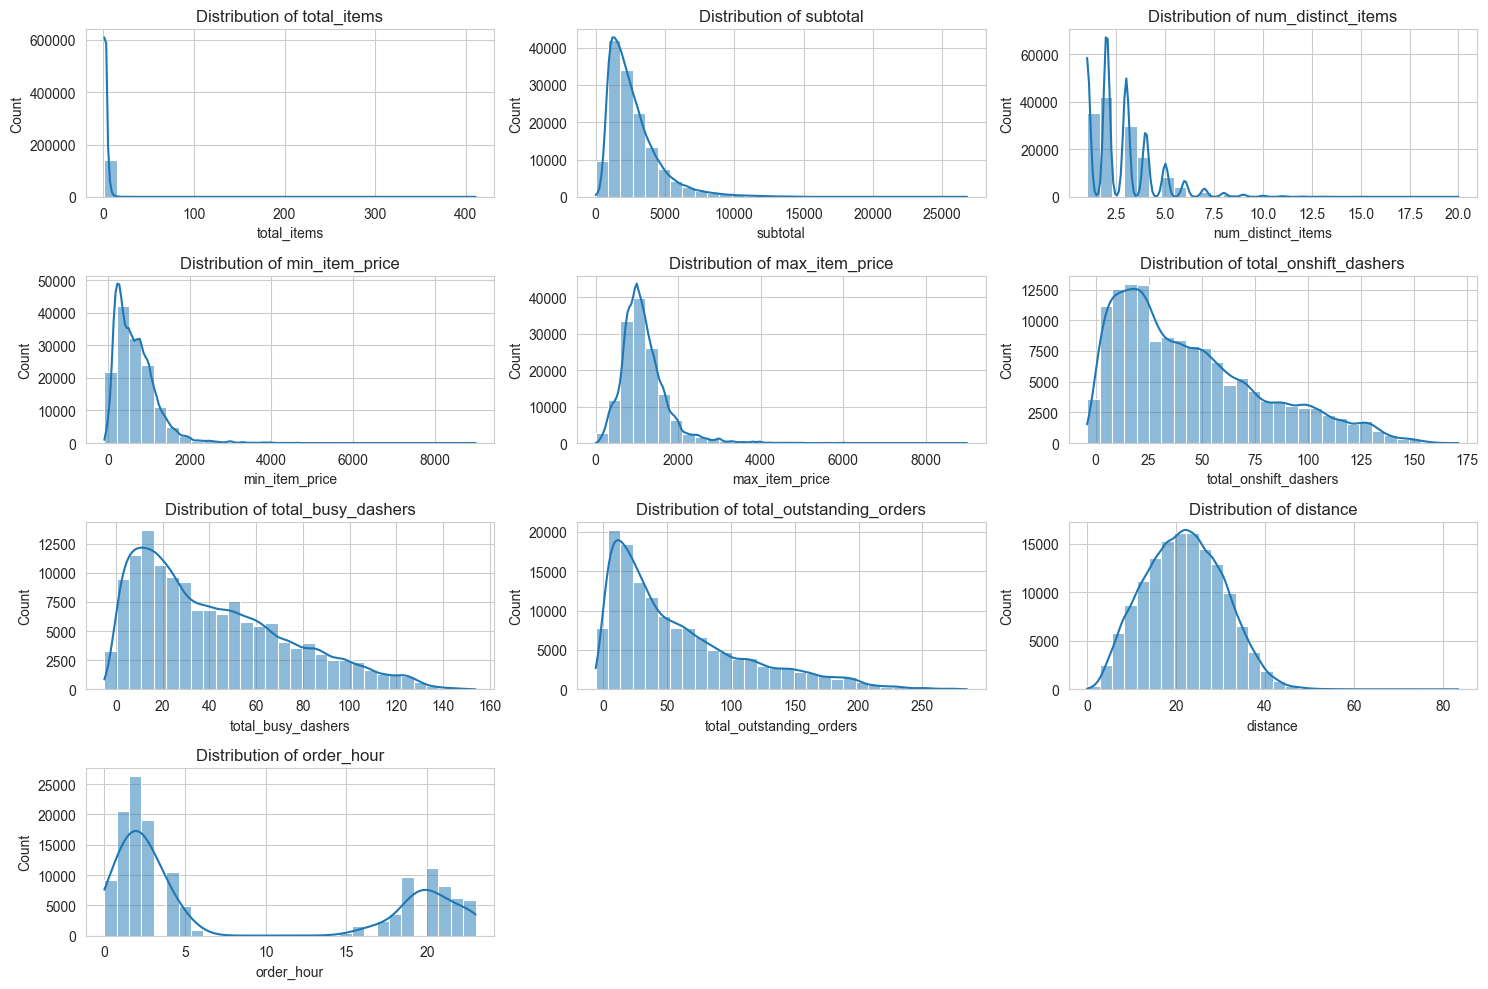

In [247]:
# Plot distributions for all numerical columns
# Set figure size
plt.figure(figsize=(15, 10))

# Plot histograms and KDE plots for numerical columns
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.histplot(X_train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

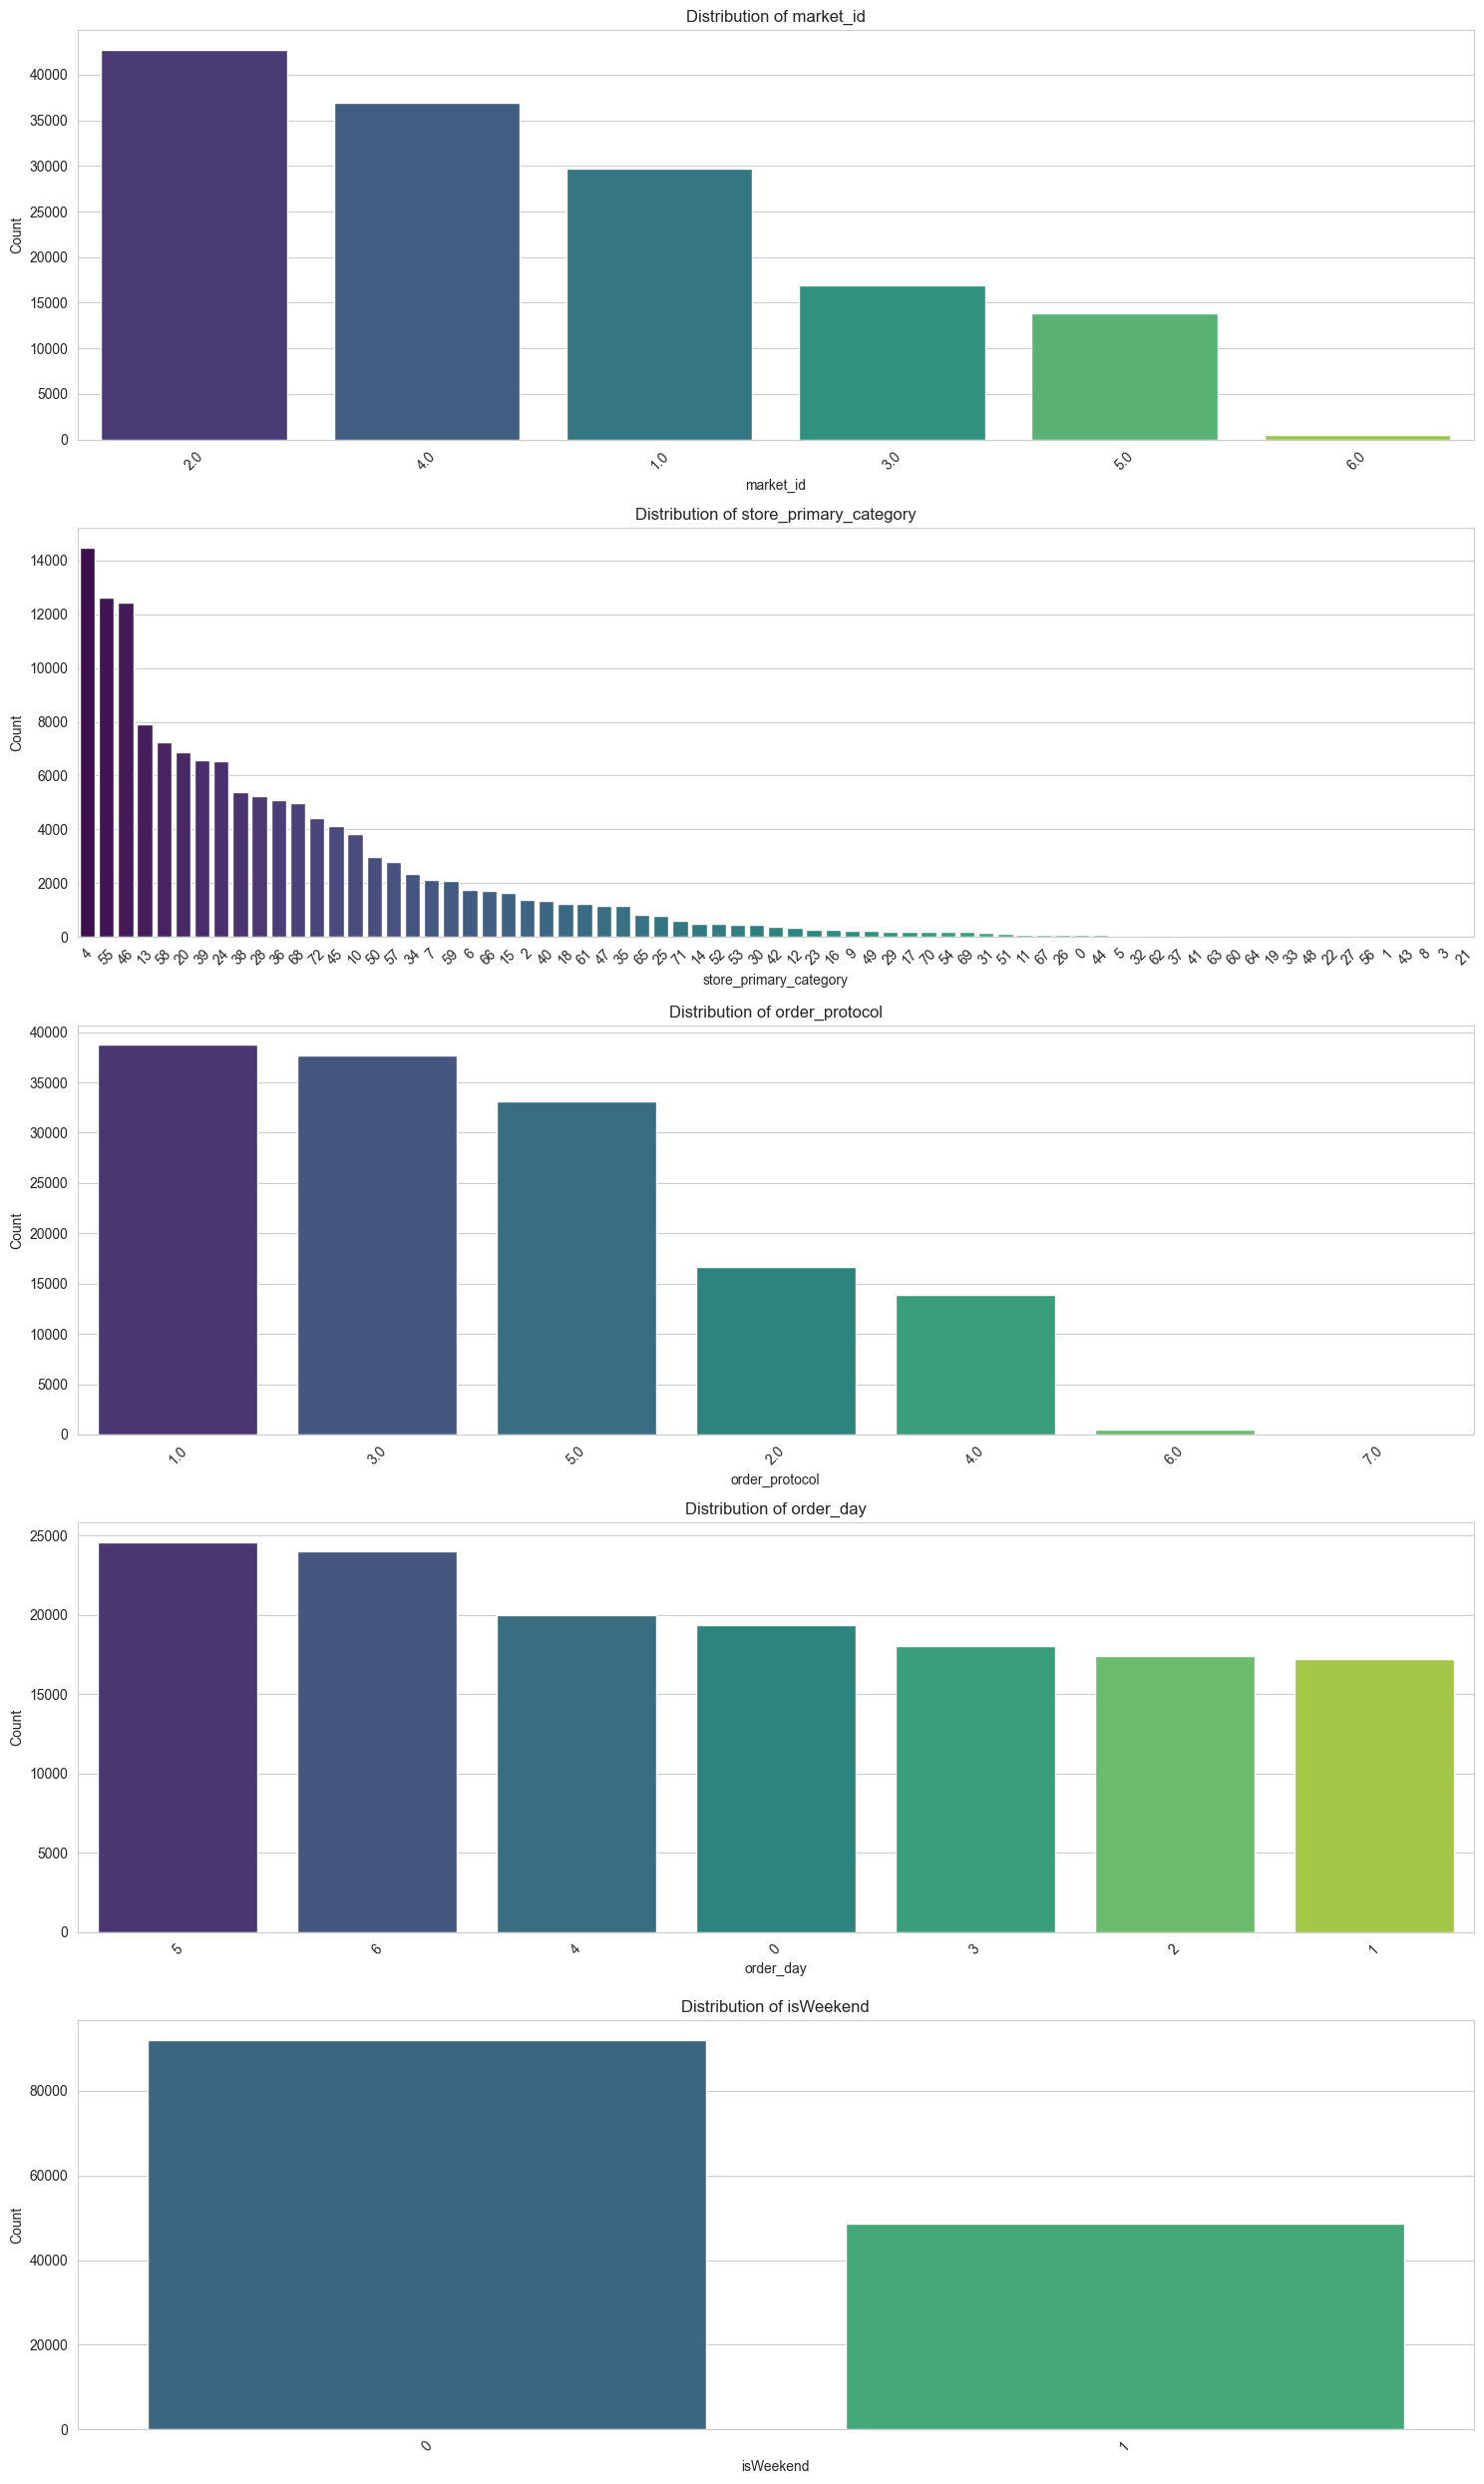

In [250]:
# Distribution of categorical columns
plt.figure(figsize=(15, 5 * len(categorical_columns)))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(x=X_train[col], palette="viridis", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

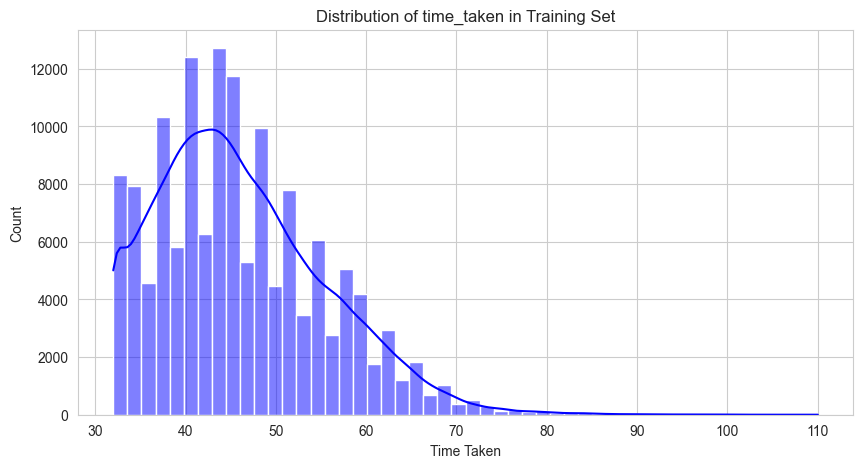

In [255]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=50, kde=True, color='blue')
plt.title('Distribution of time_taken in Training Set')
plt.xlabel('Time Taken')
plt.ylabel('Count')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

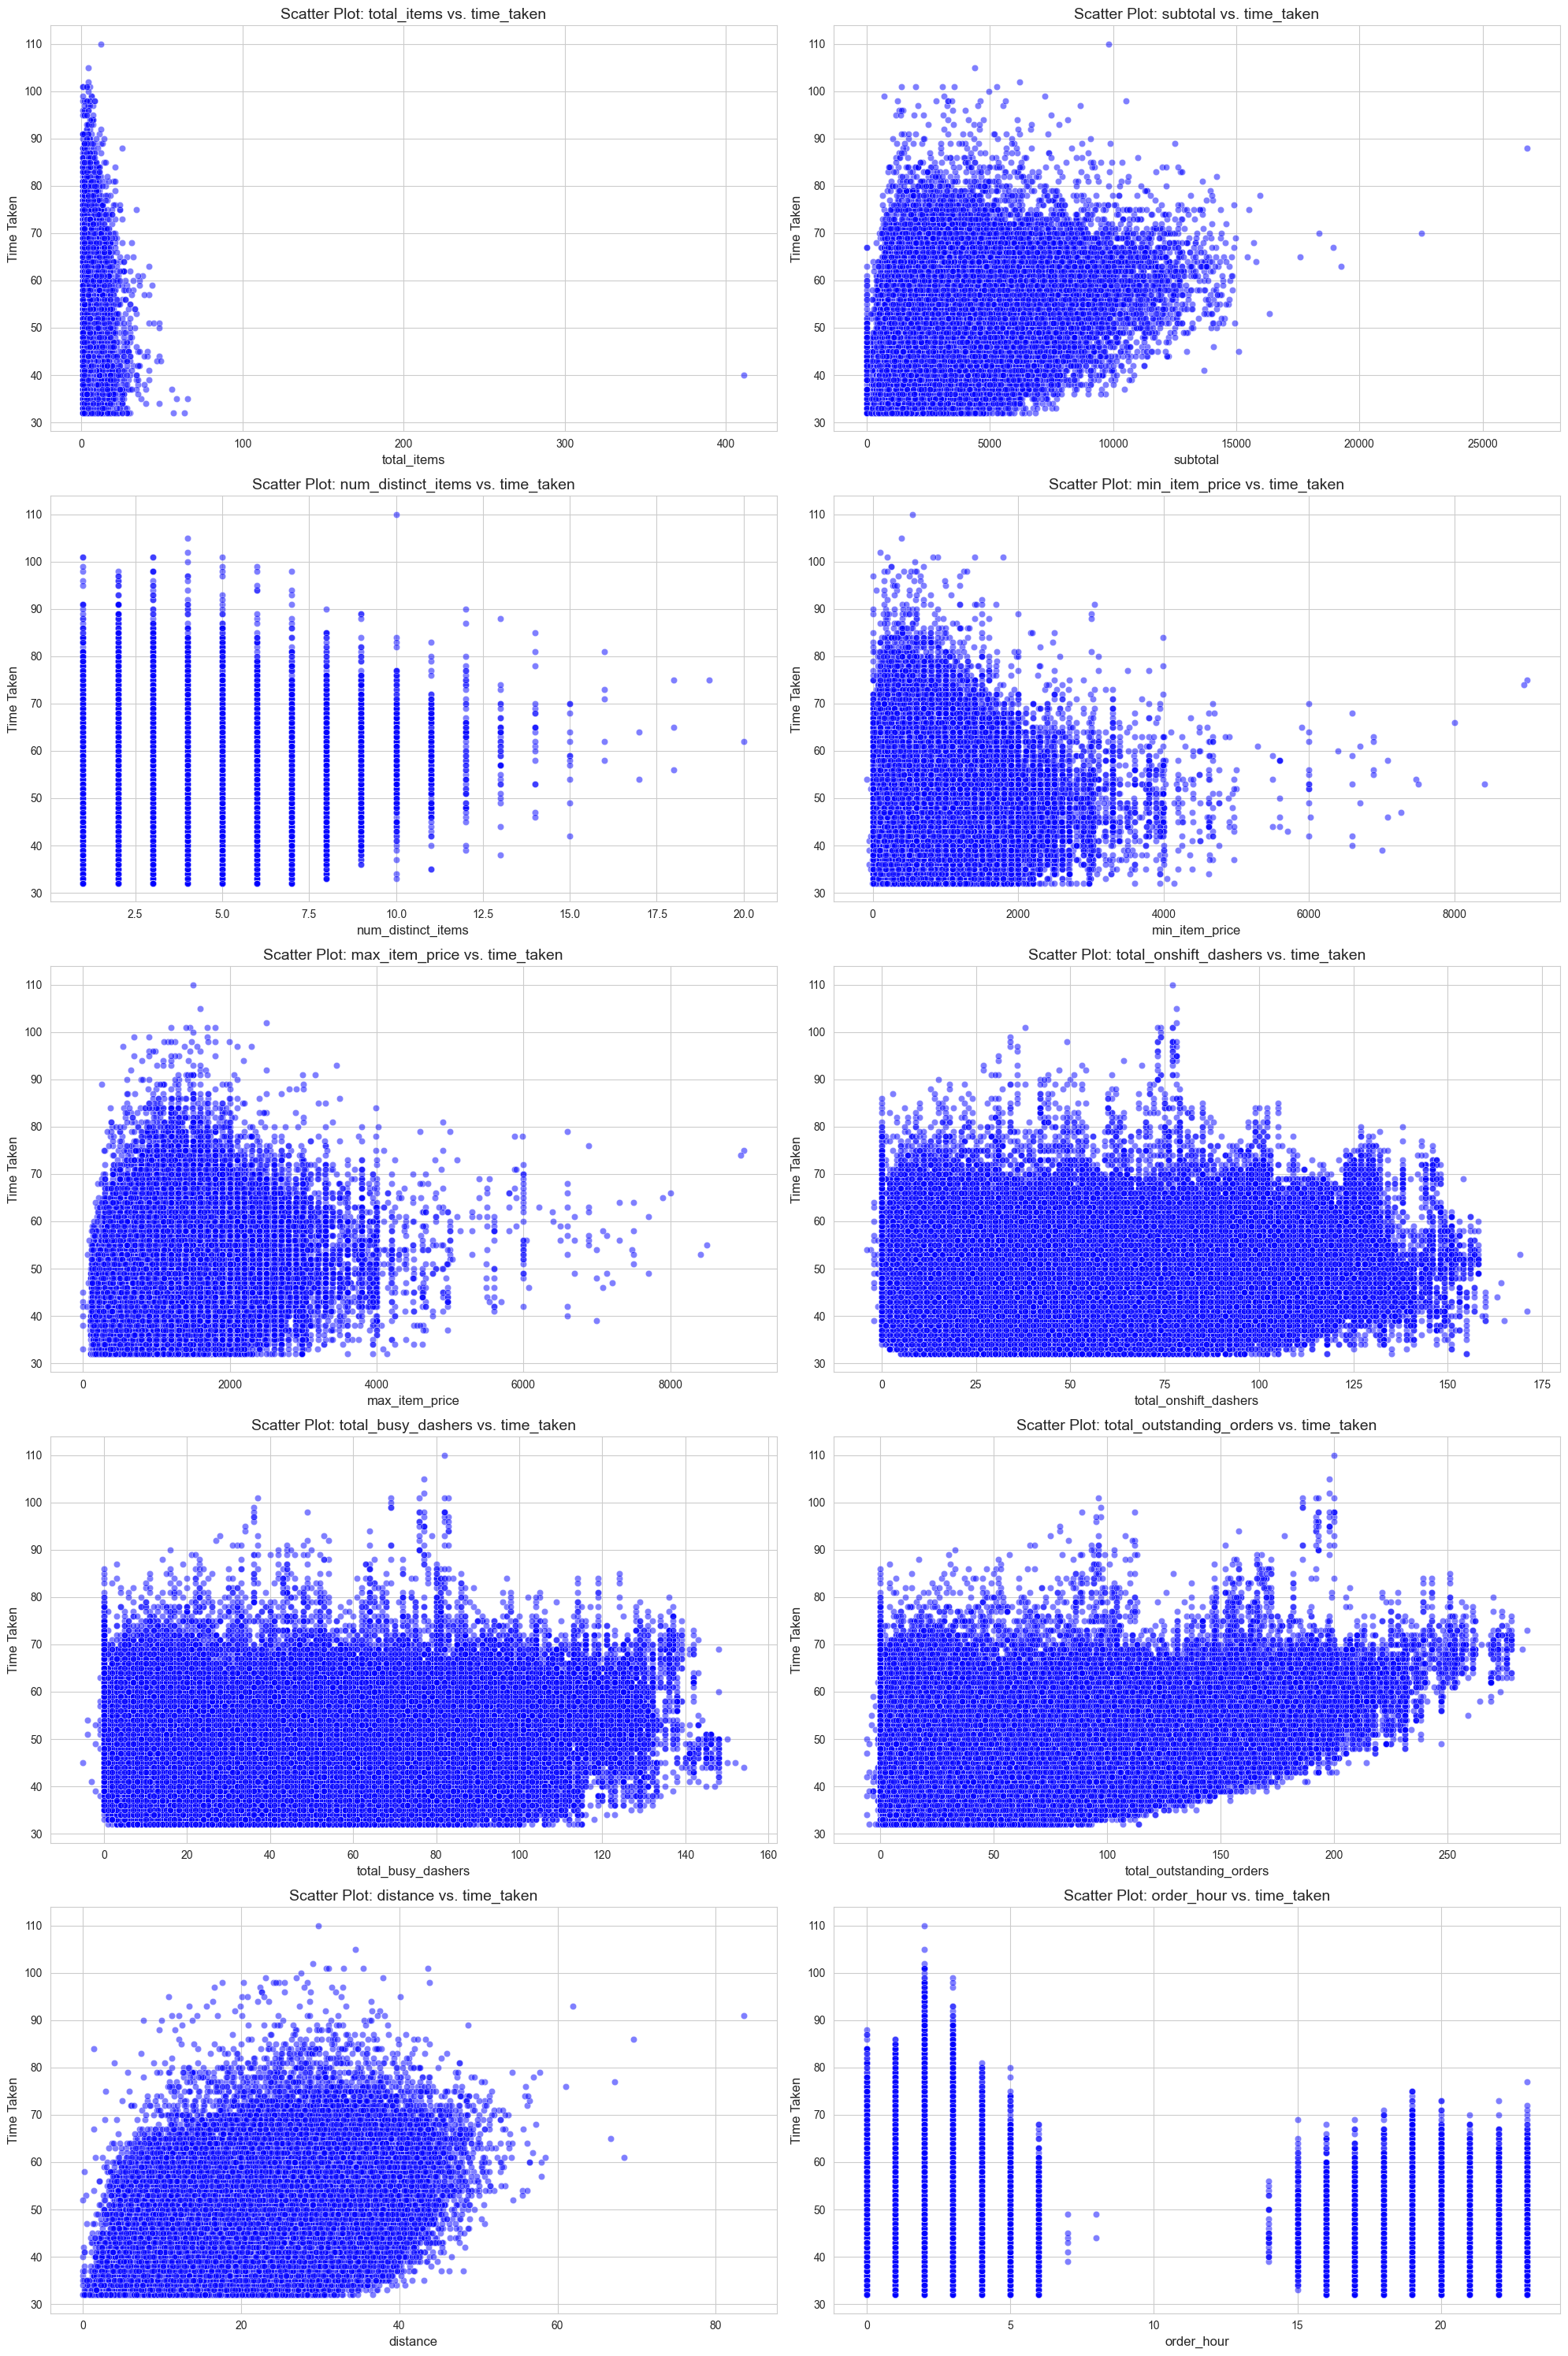

In [259]:
sns.set_style("whitegrid")

# Adjust figure size
plt.figure(figsize=(20, len(numerical_columns) * 3))  

# Define number of columns (2 plots per row)
n_cols = 2
n_rows = (len(numerical_columns) + 1) // n_cols  # Calculate required rows

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color="blue")
    plt.title(f'Scatter Plot: {col} vs. time_taken', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Time Taken', fontsize=12)

plt.tight_layout()  
plt.show()

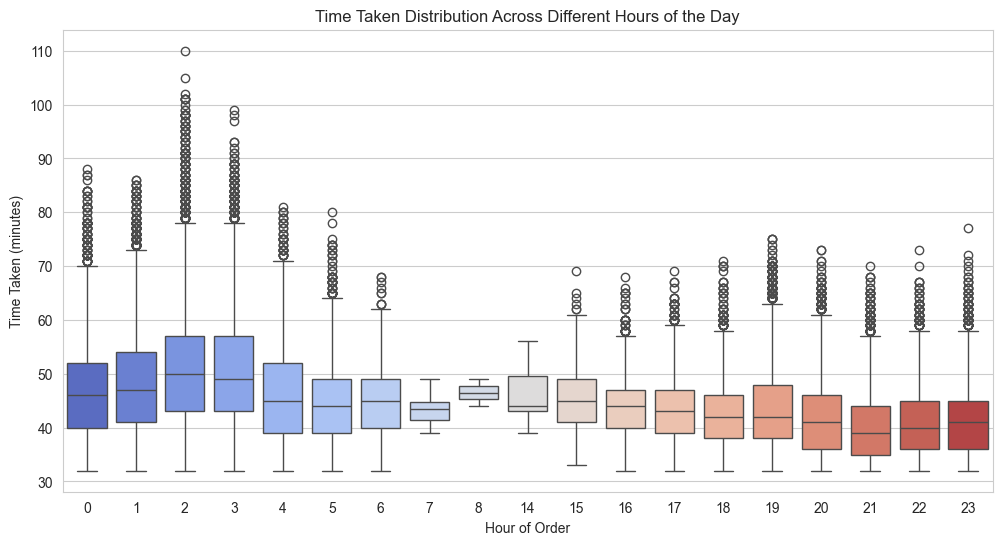

In [261]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette="coolwarm")
plt.title("Time Taken Distribution Across Different Hours of the Day")
plt.xlabel("Hour of Order")
plt.ylabel("Time Taken (minutes)")
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

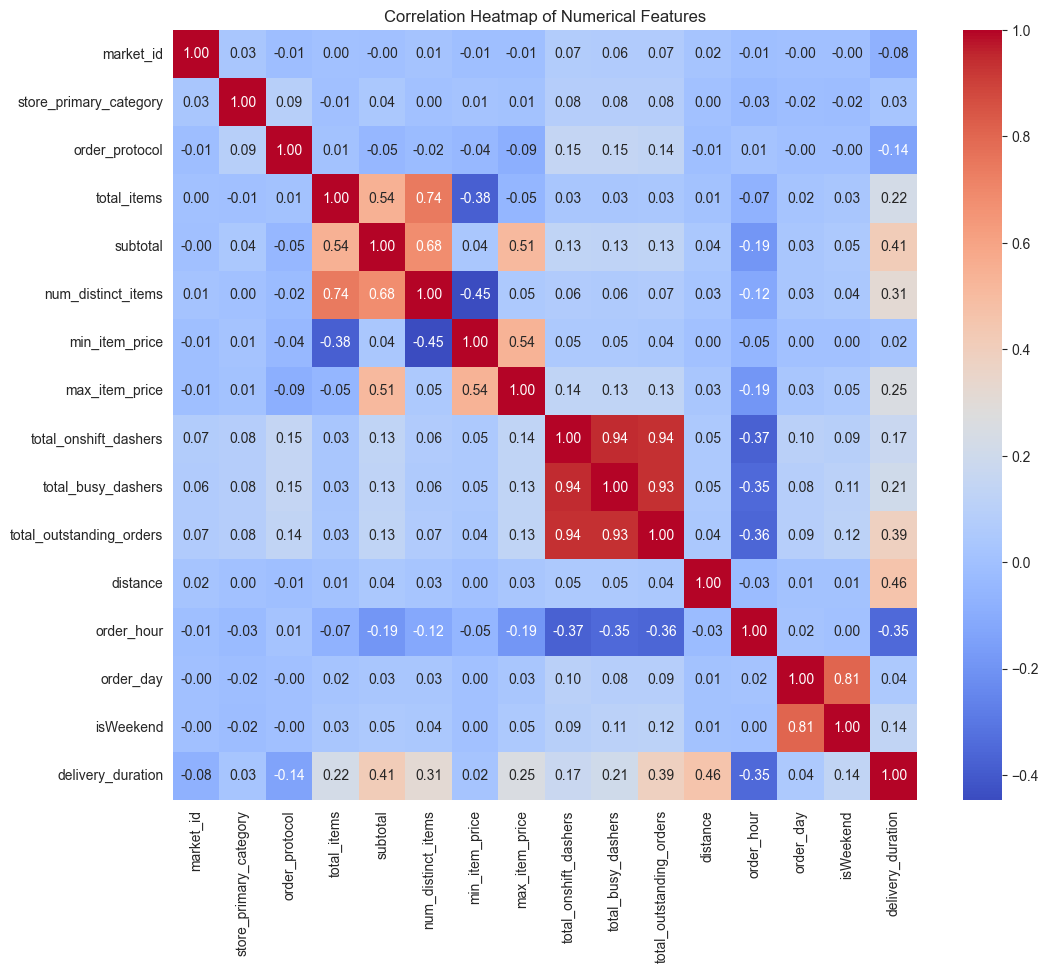


Correlation with delivery_duration:
delivery_duration           1.000000
distance                    0.461026
subtotal                    0.413392
total_outstanding_orders    0.385028
num_distinct_items          0.312510
max_item_price              0.254650
total_items                 0.220804
total_busy_dashers          0.206514
total_onshift_dashers       0.171828
isWeekend                   0.137057
order_day                   0.044897
store_primary_category      0.026388
min_item_price              0.021151
market_id                  -0.075067
order_protocol             -0.138070
order_hour                 -0.345716
Name: delivery_duration, dtype: float64


In [264]:
# Add the target variable back to the training DataFrame for correlation analysis
train_data = X_train.copy()
train_data['delivery_duration'] = y_train

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Analyze correlations with 'delivery_duration'
correlation_with_target = correlation_matrix['delivery_duration'].sort_values(ascending=False)
print("\nCorrelation with delivery_duration:")
print(correlation_with_target)

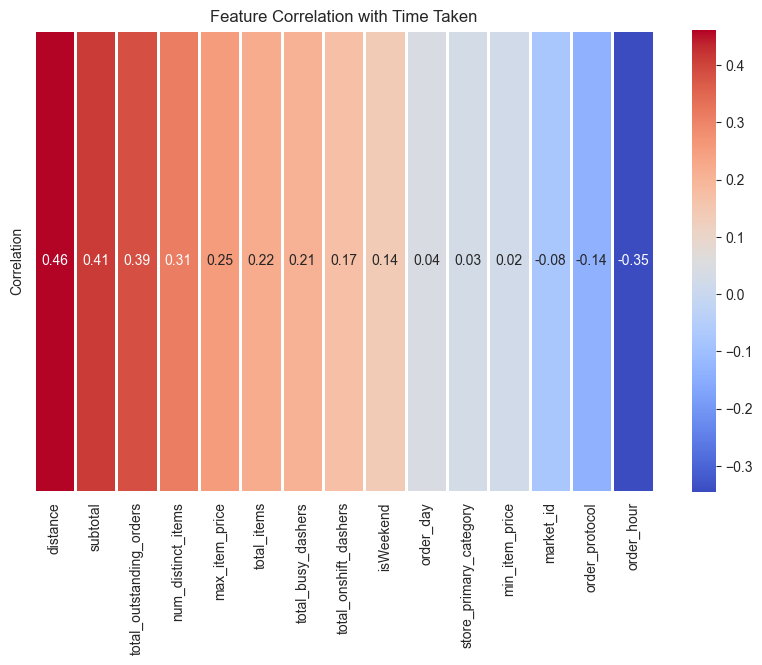

In [266]:
# Compute correlation of numerical features with target
correlation_with_target = X_train.corrwith(y_train)

# Convert it into a DataFrame for better visualization
correlation_df = correlation_with_target.to_frame(name='Correlation')
correlation_df.sort_values(by="Correlation", ascending=False, inplace=True)

# Plot correlation with target variable
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title("Feature Correlation with Time Taken")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [269]:
# Columns with weak correlations (based on your previous output)
weak_corr_cols = ['order_day', 'store_primary_category', 'min_item_price', 'market_id']

# Drop the columns from the training and testing sets
X_train = X_train.drop(columns=weak_corr_cols, errors='ignore')
X_test = X_test.drop(columns=weak_corr_cols, errors='ignore')

# Verify the shapes of the updated sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (140621, 11)
X_test shape: (35156, 11)


In [391]:
numerical_columns = X_train.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['category']).columns.tolist()

# Print results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']
Categorical Columns: ['order_protocol', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

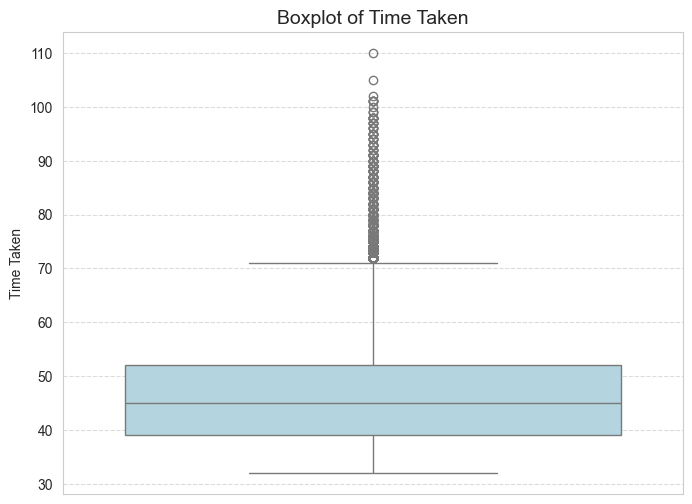

In [275]:
# Boxplot for time_taken
# Set figure size
plt.figure(figsize=(8, 6))

# Create a boxplot for time_taken
sns.boxplot(y=y_train, color='lightblue')

# Add title
plt.title("Boxplot of Time Taken", fontsize=14)
plt.ylabel("Time Taken")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


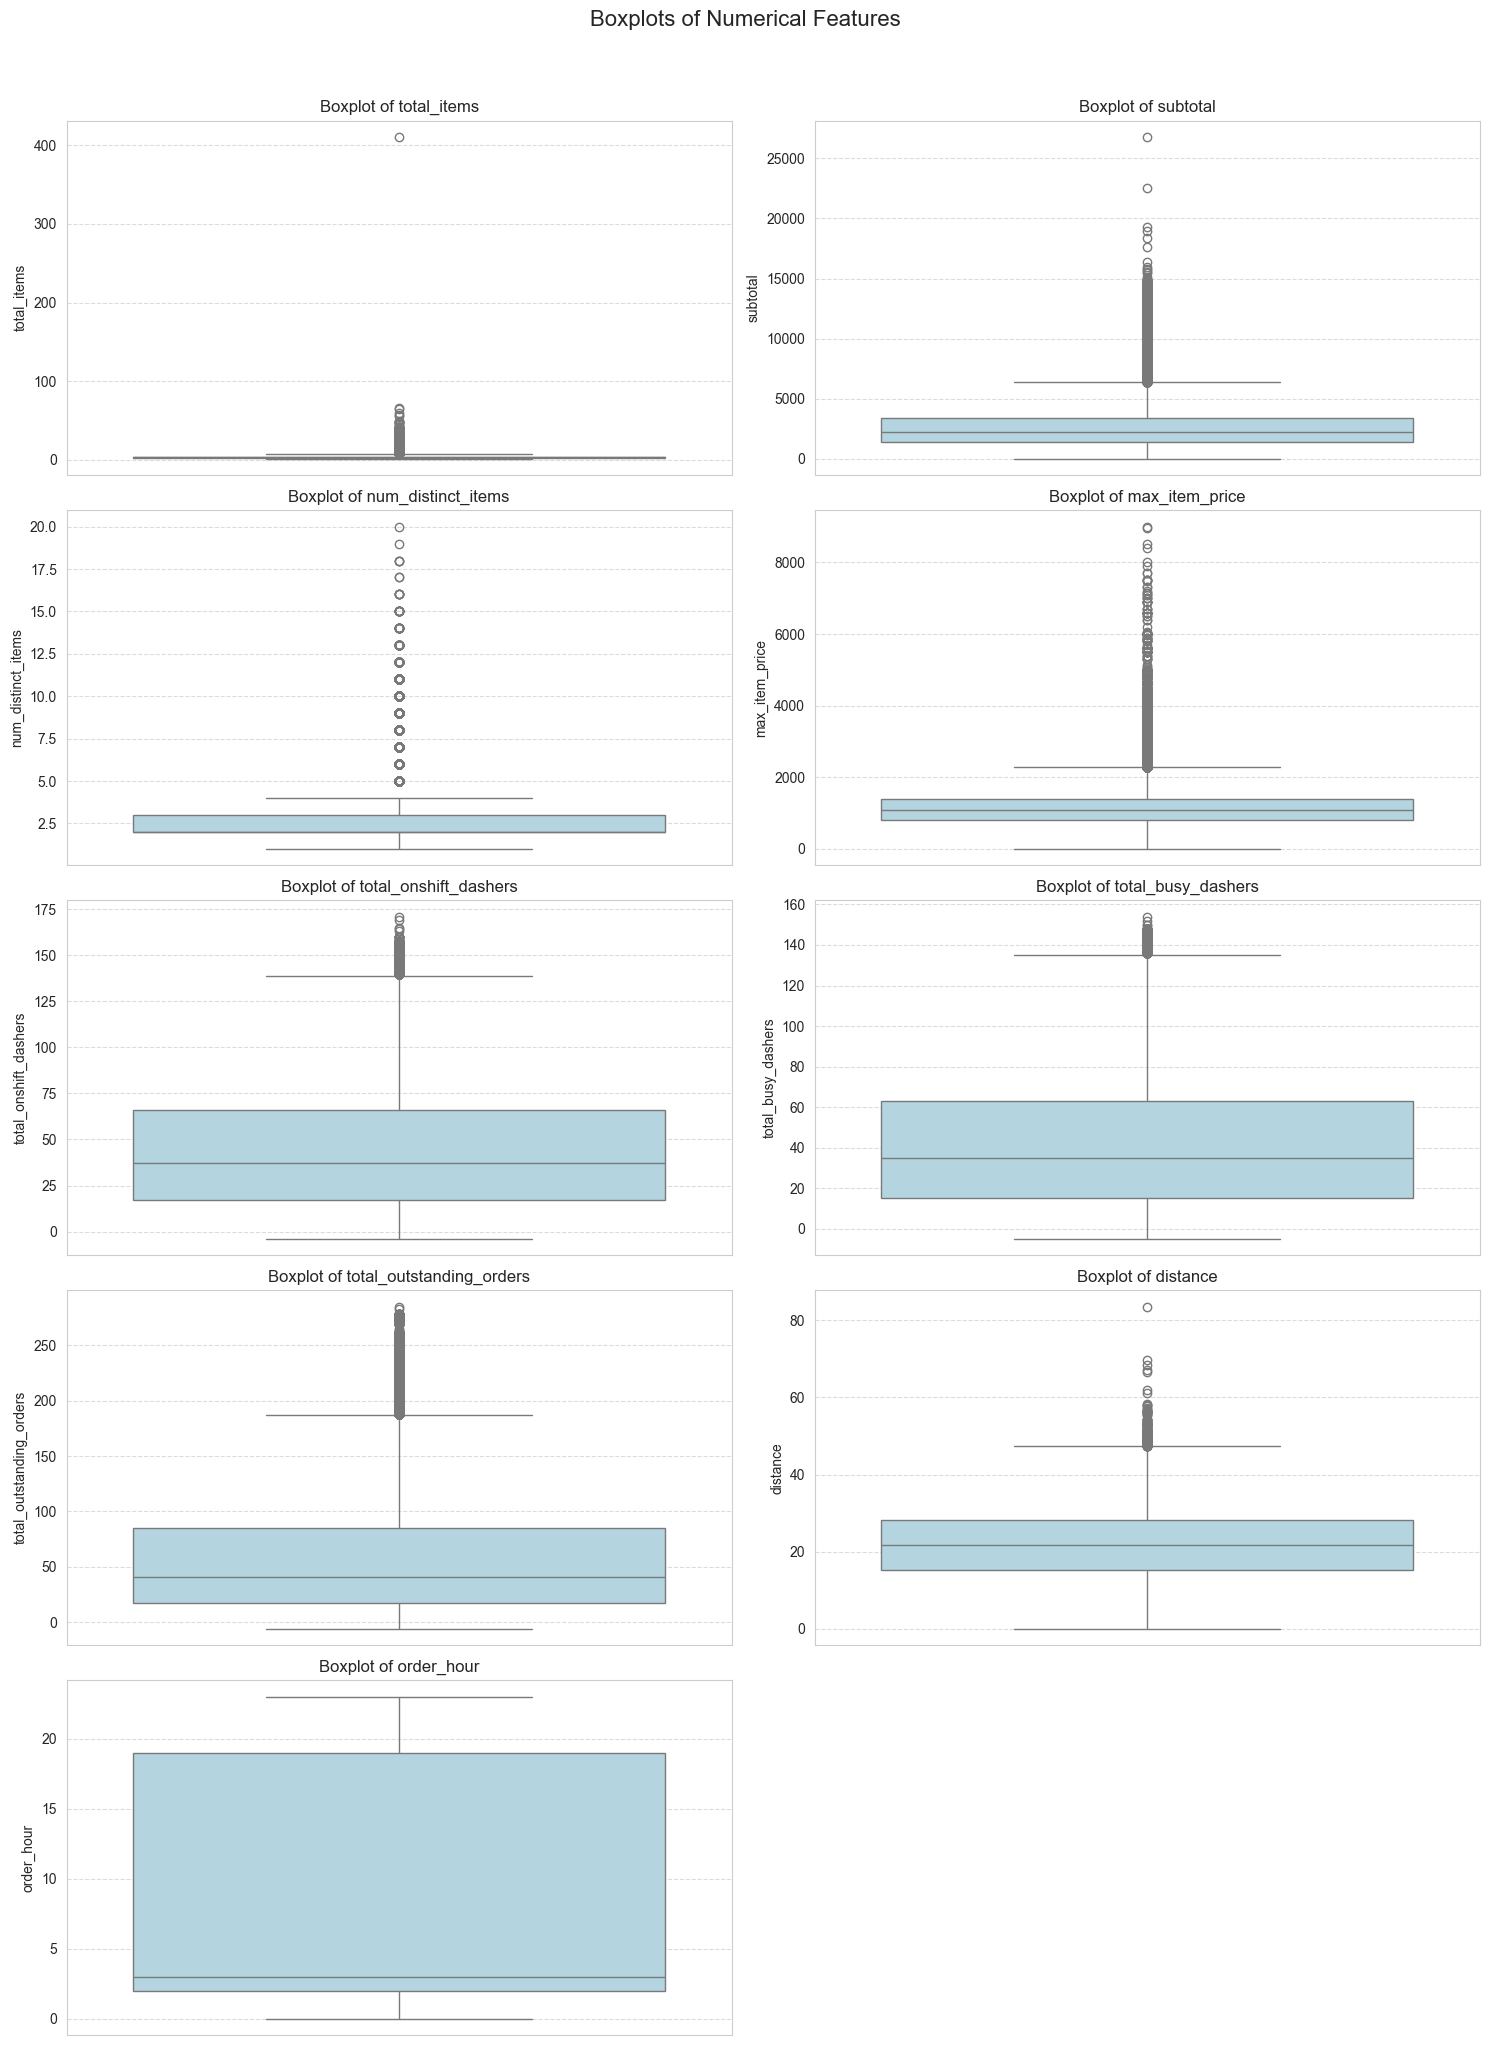

In [277]:
# Set figure size dynamically based on the number of numerical columns
n_cols = 2  # Number of plots per row
n_rows = (len(numerical_columns) + 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust size
fig.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)  # Title for all plots

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and create a boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=X_train[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Hide any empty subplots (if the number of columns is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [280]:
from scipy import stats

def handle_outliers(df):
    """Handles outliers in all numerical columns of a DataFrame."""
    for col in df.select_dtypes(include=np.number).columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply outlier handling to training and testing sets
X_train_cleaned = handle_outliers(X_train.copy()) #Make a copy to avoid changing the original.
X_test_cleaned = handle_outliers(X_test.copy())

# If you also want to handle outliers in the target variable
def handle_outliers_target(series):
    """Handles outliers in a pandas Series (target variable)."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series_cleaned = np.where(series < lower_bound, lower_bound, series)
    series_cleaned = np.where(series > upper_bound, upper_bound, series)
    return series_cleaned

y_train_cleaned = handle_outliers_target(y_train.copy())
y_test_cleaned = handle_outliers_target(y_test.copy())


In [282]:
print("X_train_cleaned shape:", X_train_cleaned.shape)
print("y_train_cleaned shape:", y_train_cleaned.shape)
print("X_test_cleaned shape:", X_test_cleaned.shape)
print("y_test_cleaned shape:", y_test_cleaned.shape)


X_train_cleaned shape: (140621, 11)
y_train_cleaned shape: (140621,)
X_test_cleaned shape: (35156, 11)
y_test_cleaned shape: (35156,)


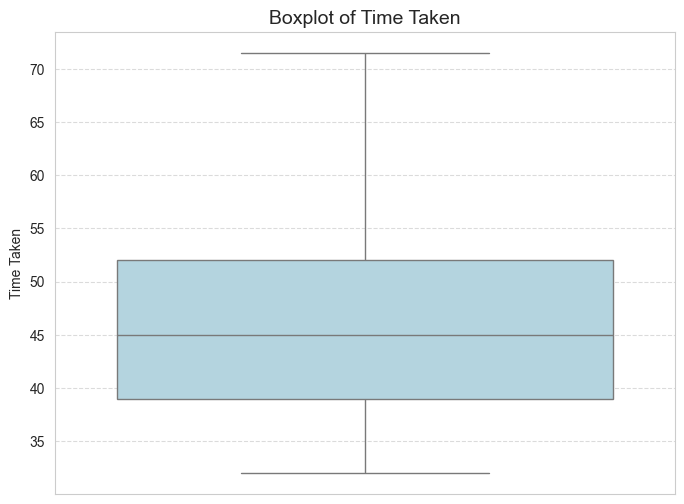

In [284]:
# Boxplot for time_taken
# Set figure size
plt.figure(figsize=(8, 6))

# Create a boxplot for time_taken
sns.boxplot(y=y_train_cleaned, color='lightblue')

# Add title
plt.title("Boxplot of Time Taken", fontsize=14)
plt.ylabel("Time Taken")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

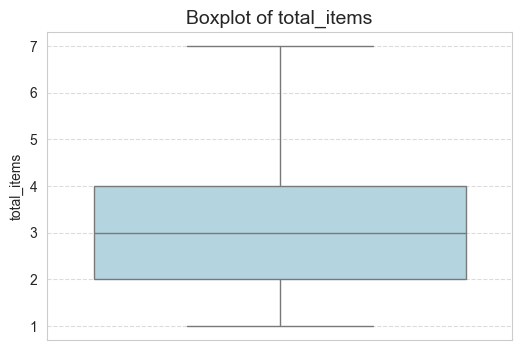

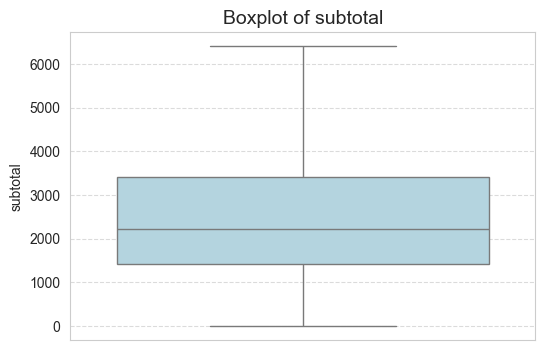

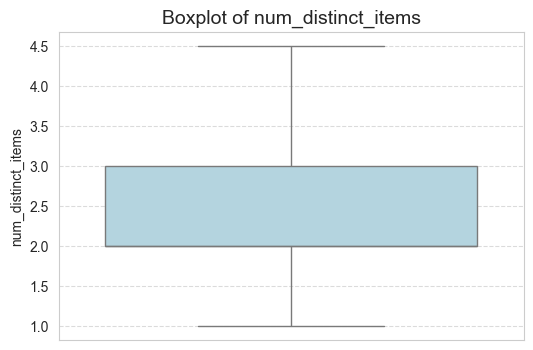

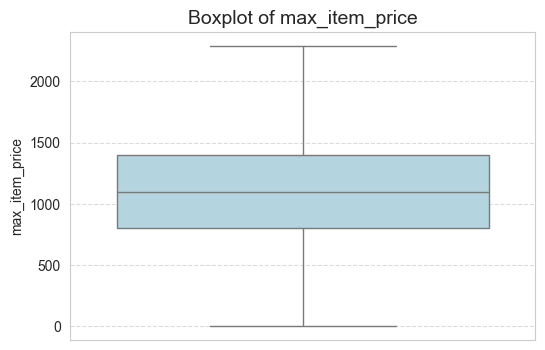

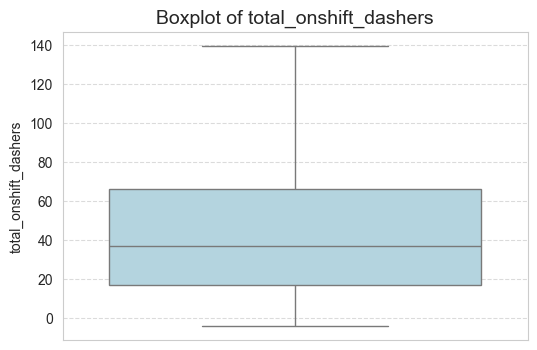

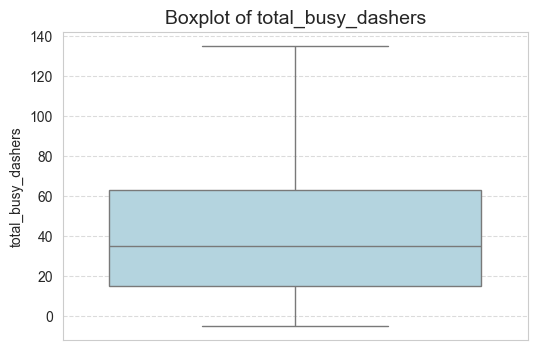

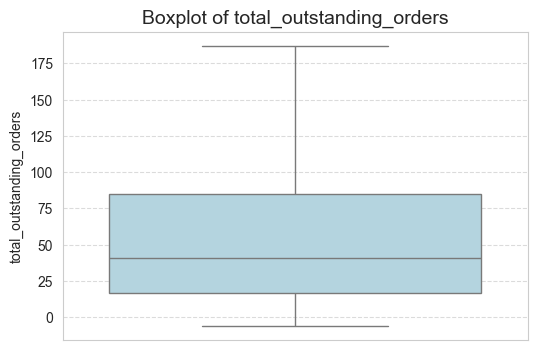

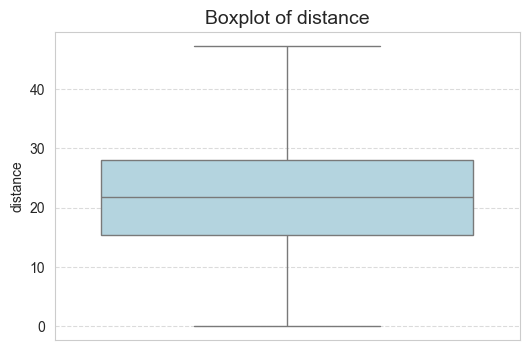

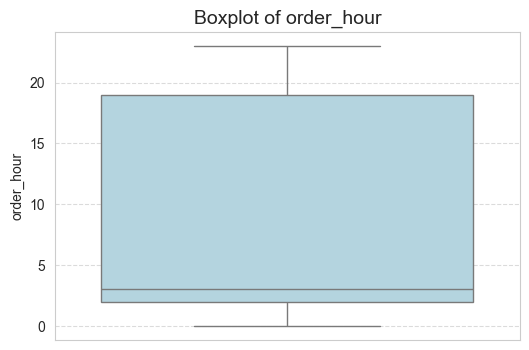

In [286]:
# Boxplots for all numerical features
plt.figure(figsize=(12, 10))

# Loop through each numerical column and plot boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=X_train_cleaned[col], color='lightblue')
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.ylabel(col)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [289]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Summary statistics for numerical features
print("Training Data Summary:\n", X_train[numerical_columns].describe())
print("\nValidation Data Summary:\n", X_test[numerical_columns].describe())



Training Data Summary:
          total_items       subtotal  num_distinct_items  max_item_price  \
count  140621.000000  140621.000000       140621.000000   140621.000000   
mean        3.208582    2698.872530            2.676464     1159.948656   
std         2.727133    1830.808391            1.626023      559.693980   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1418.000000            2.000000      799.000000   
50%         3.000000    2225.000000            2.000000     1095.000000   
75%         4.000000    3415.000000            3.000000     1395.000000   
max       411.000000   26800.000000           20.000000     8999.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.927948           41.880025                 58.245148   
std                34.572455           32.197755                 5

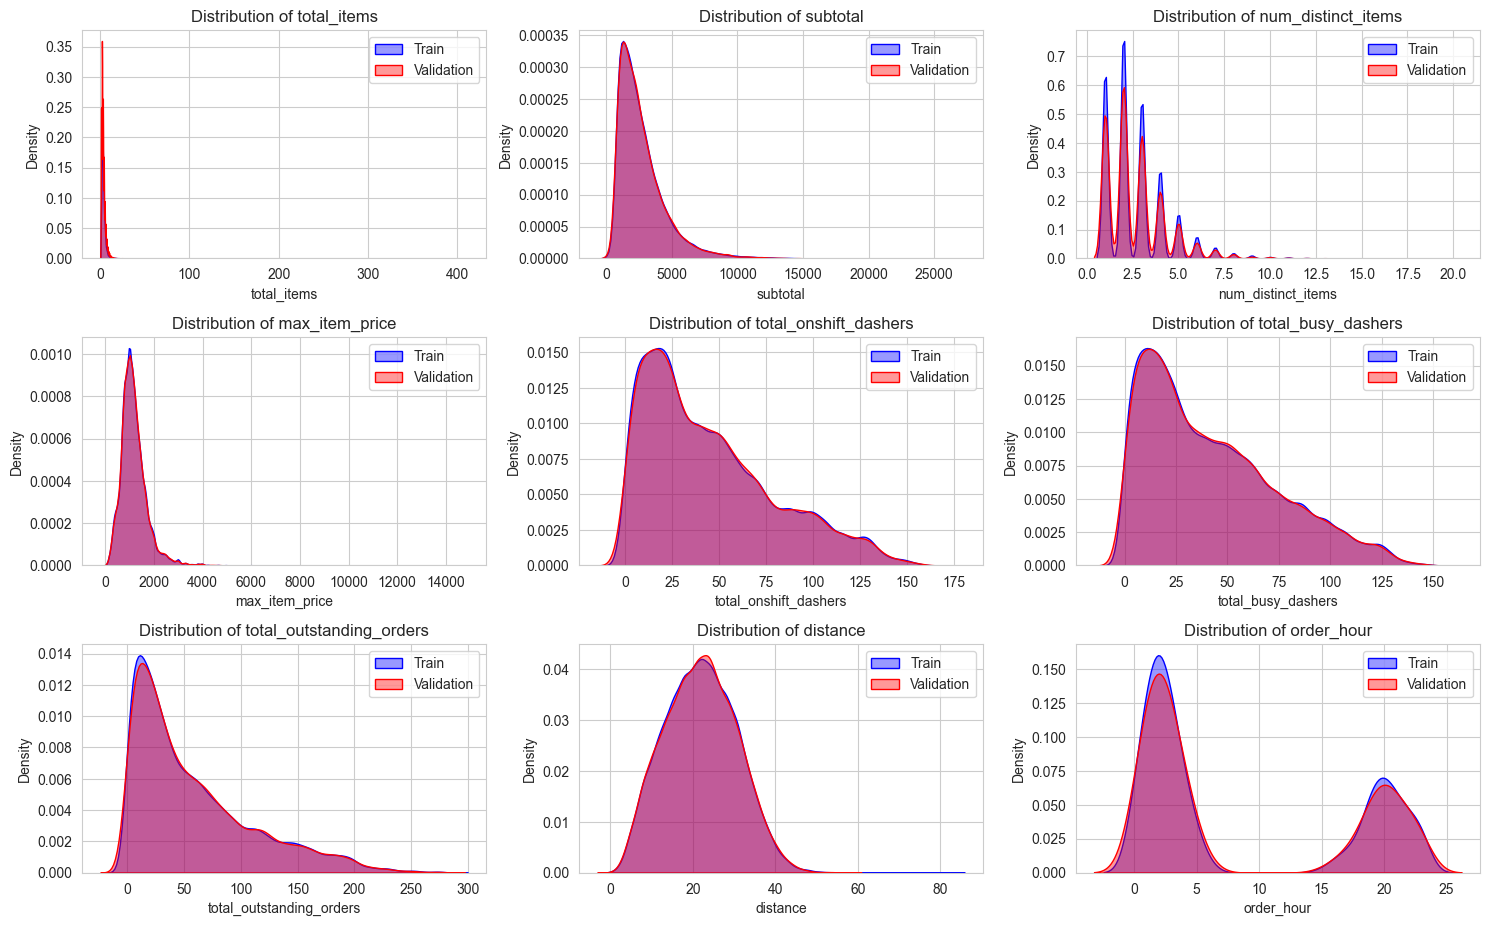

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(X_train[col], label="Train", color="blue", fill=True, alpha=0.4)
    sns.kdeplot(X_test[col], label="Validation", color="red", fill=True, alpha=0.4)
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()


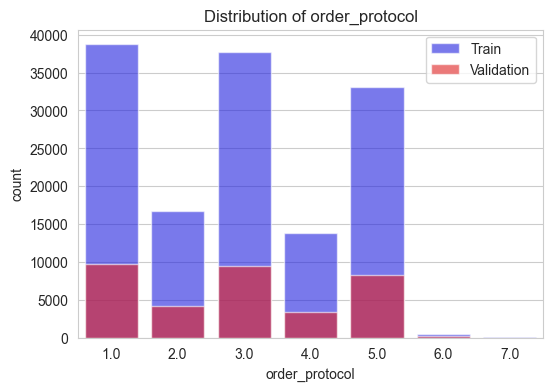

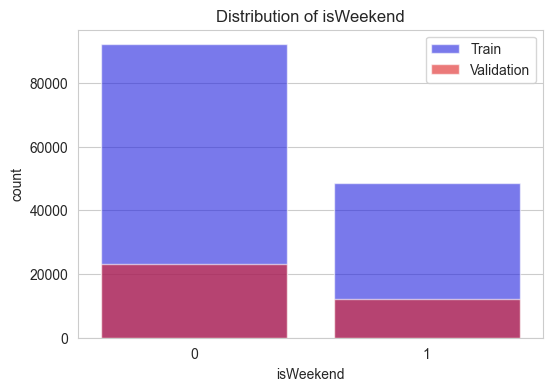

In [292]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X_train[col], color="blue", label="Train", alpha=0.6)
    sns.countplot(x=X_test[col], color="red", label="Validation", alpha=0.6)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

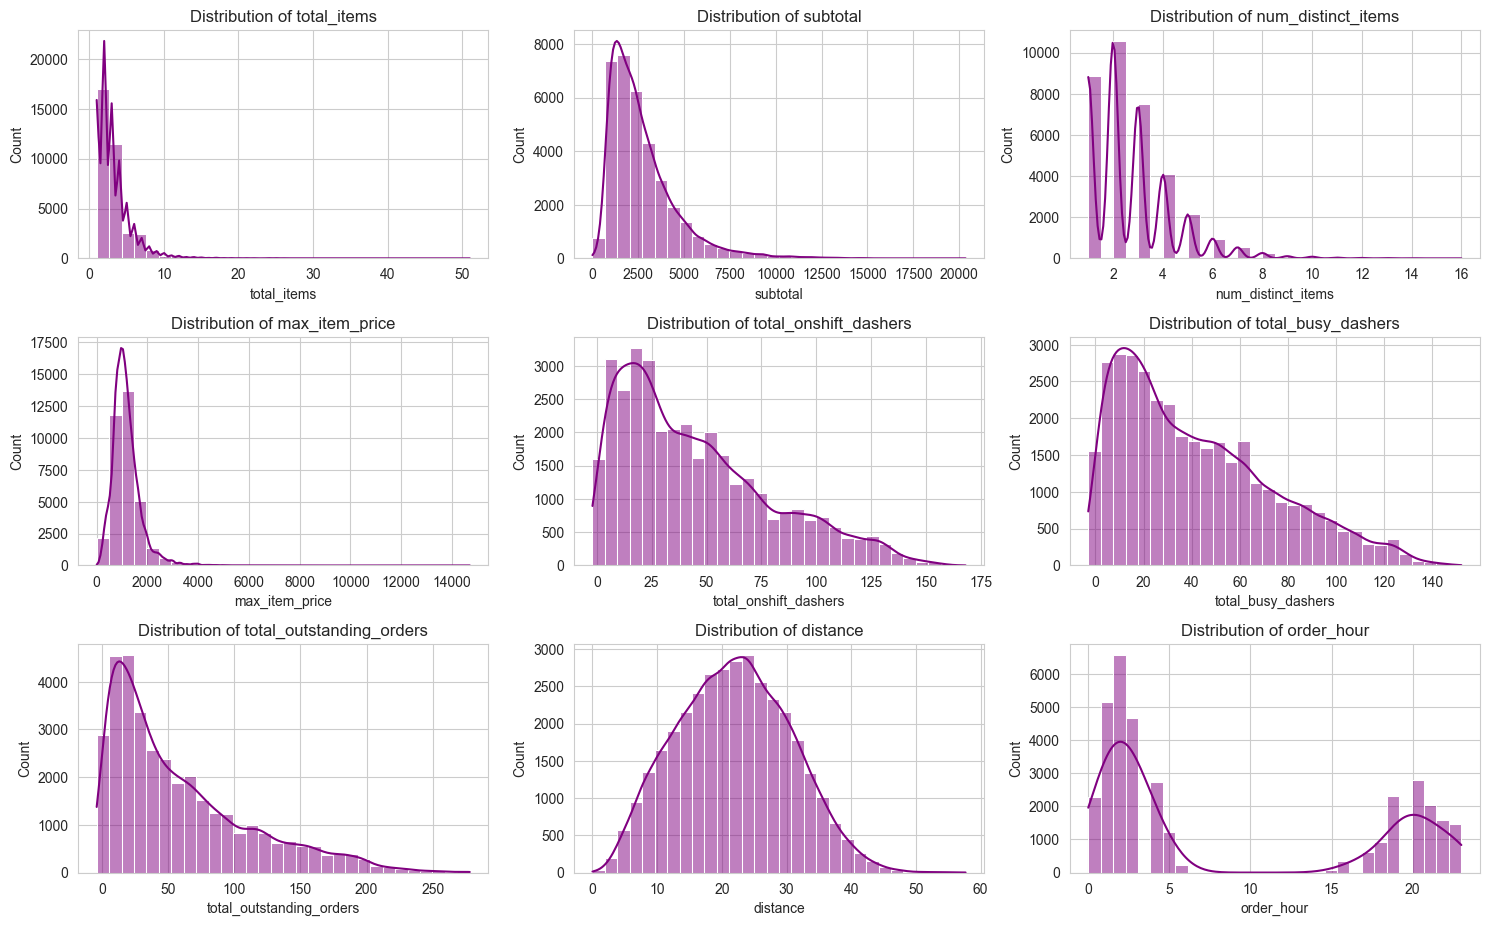

In [295]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_test[col], bins=30, kde=True, color='purple')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()



##### **4.1.2**
Check the distribution of categorical features

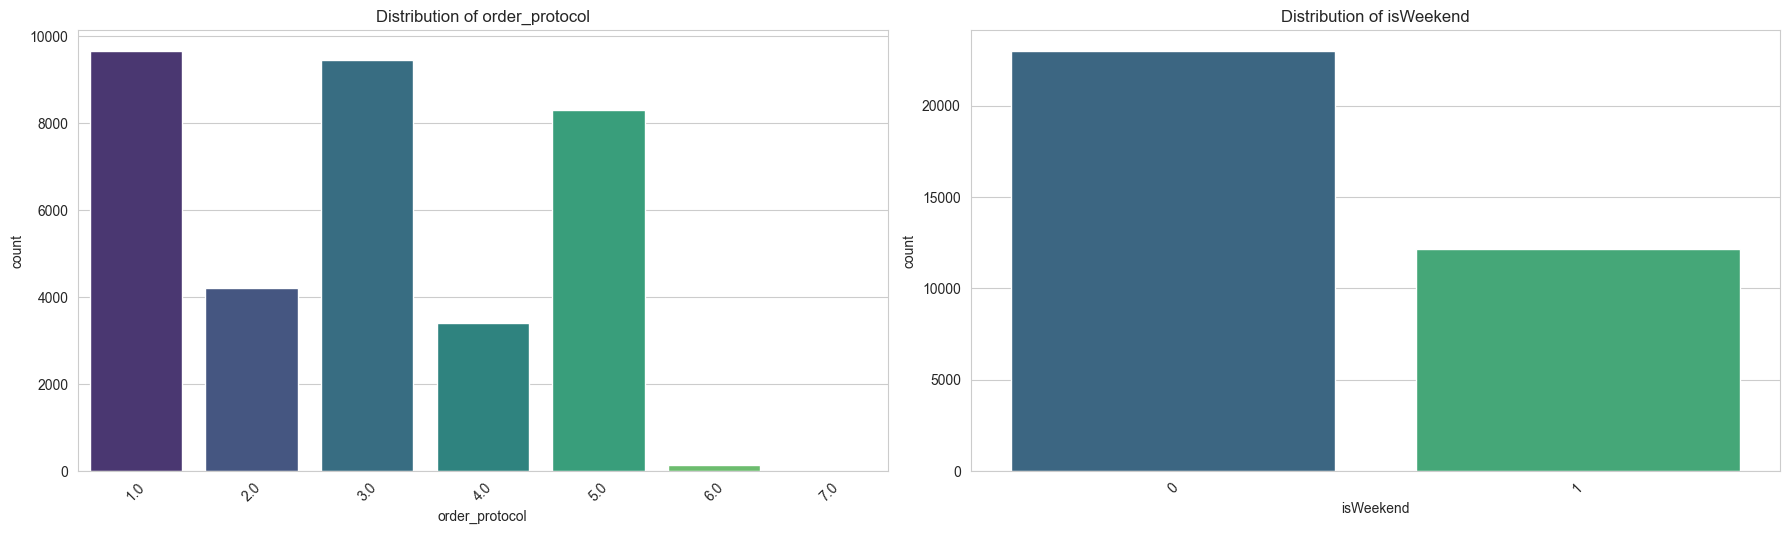

In [300]:
# Distribution of categorical columns
plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=X_test[col], palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

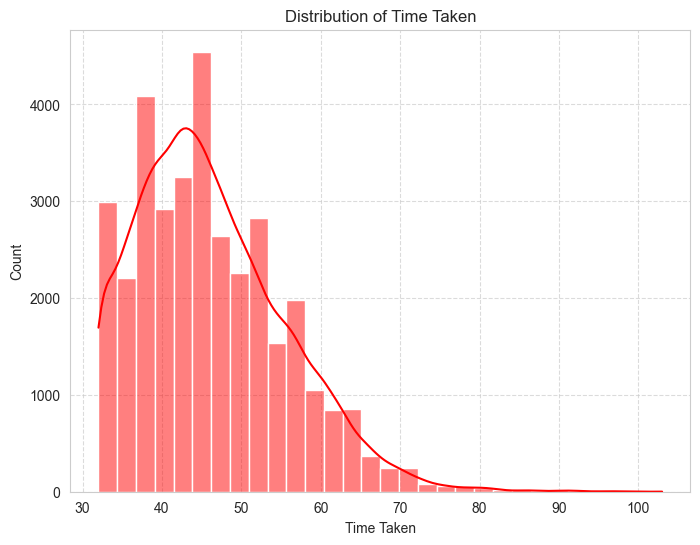

In [303]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_test, bins=30, kde=True, color='red')
plt.title("Distribution of Time Taken")
plt.xlabel("Time Taken")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

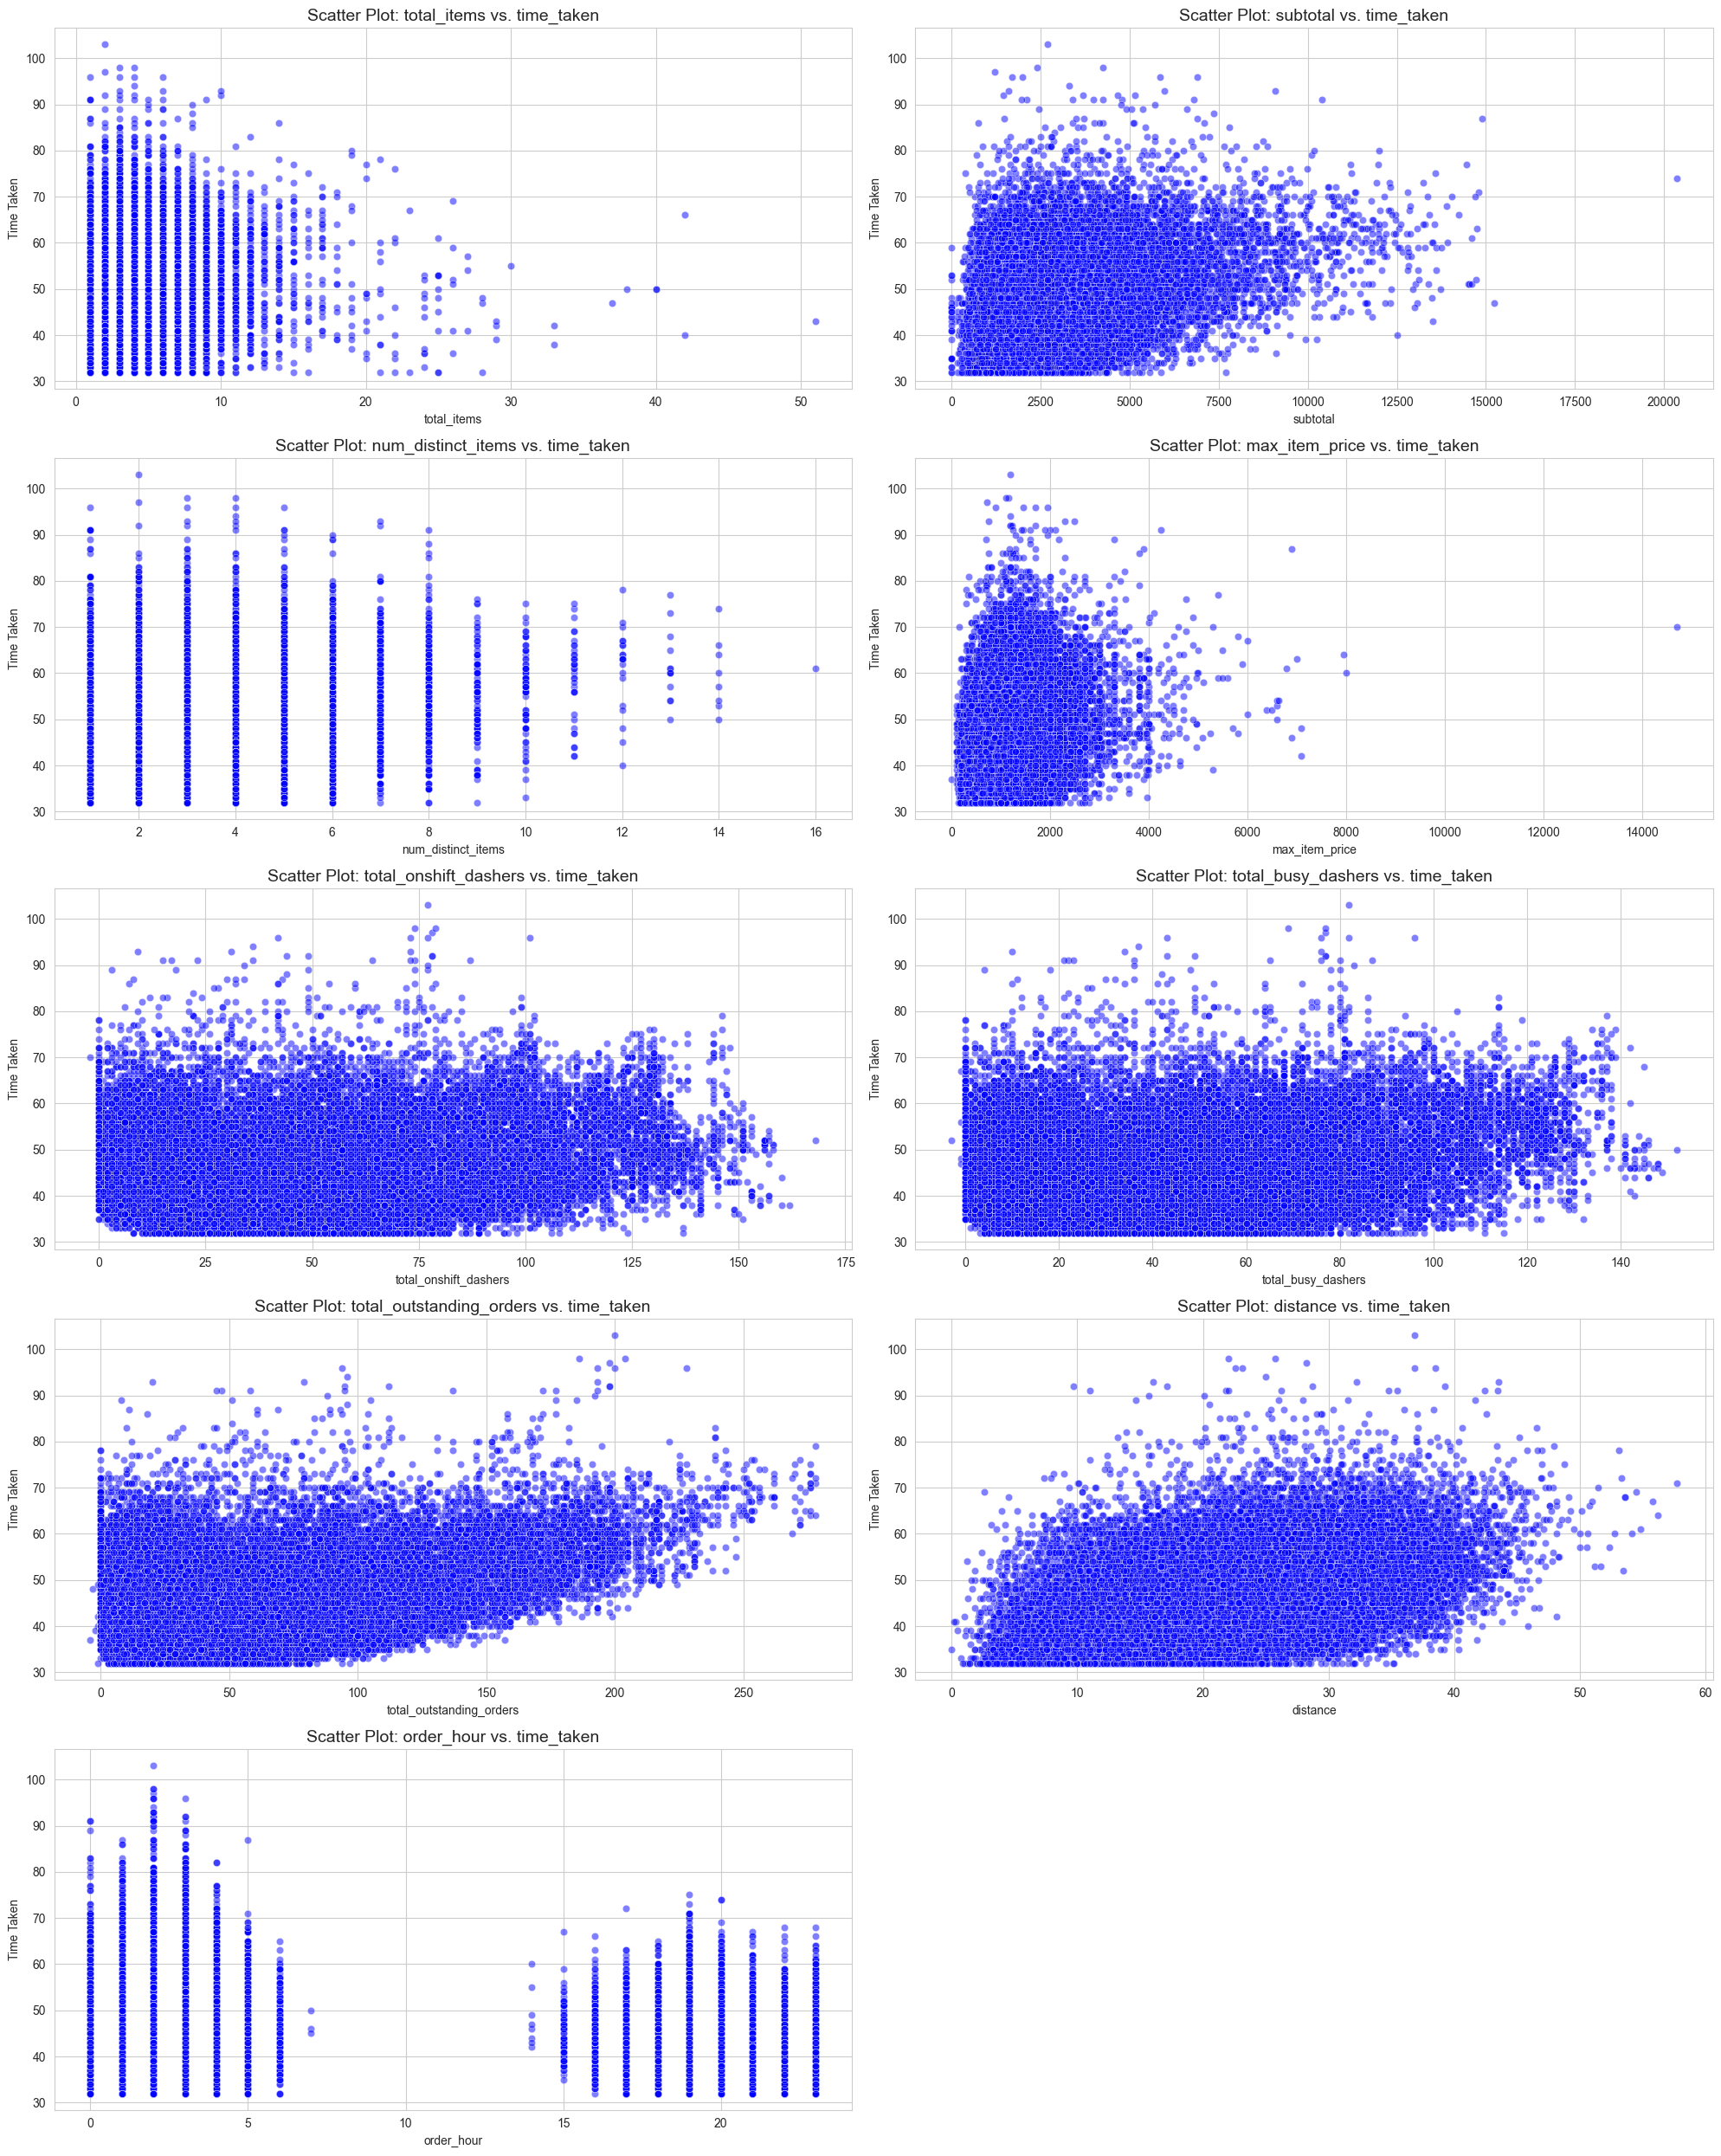

In [306]:
# Scatter plot to visualise the relationship between time_taken and other features
sns.set_style("whitegrid")
plt.figure(figsize=(20, 25))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) // 2) + 1, 2, i)  # 2 plots per row
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5, color="blue")
    plt.title(f'Scatter Plot: {col} vs. time_taken', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Time Taken')

plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

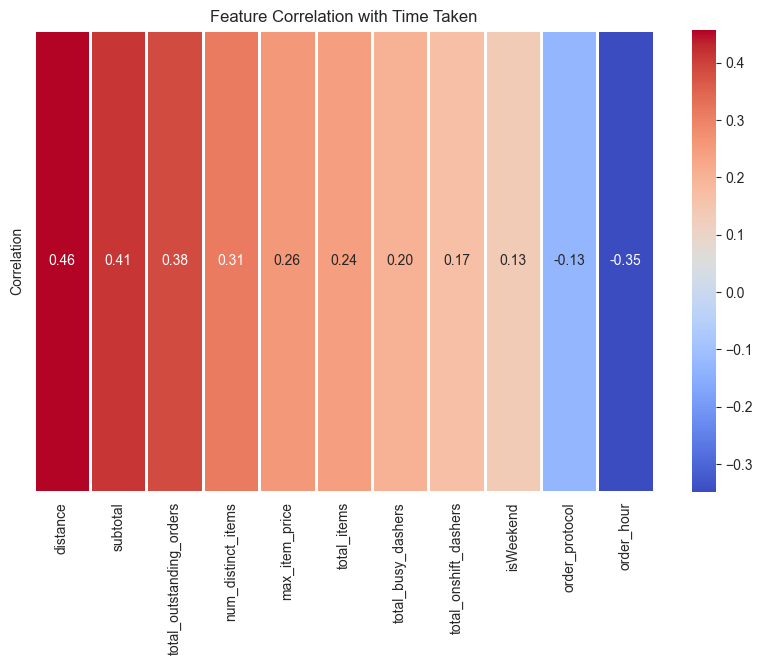

In [309]:
# Drop the weakly correlated columns from training dataset
# Compute correlation of numerical features with target
correlation_with_target = X_test.corrwith(y_test)

# Convert it into a DataFrame for better visualization
correlation_df = correlation_with_target.to_frame(name='Correlation')
correlation_df.sort_values(by="Correlation", ascending=False, inplace=True)

# Plot correlation with target variable
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title("Feature Correlation with Time Taken")
plt.show()


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [313]:
# Import libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [316]:
# Select the scaler (choose one based on your data)
scaler = StandardScaler()  # Use MinMaxScaler() if you prefer normalization

# Initialize the scaler
scaler = StandardScaler() # Or MinMaxScaler(), RobustScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_cleaned)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test_cleaned)

# Convert the scaled arrays back to DataFrames (optional but recommended)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_cleaned.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_cleaned.columns)

# Display the head of the scaled data to verify
print("Scaled Training Data:")
print(X_train_scaled.head())
print("\nScaled Testing Data:")
print(X_test_scaled.head())

Scaled Training Data:
   order_protocol  total_items  subtotal  num_distinct_items  max_item_price  \
0       -0.602448    -1.149075 -1.166865           -1.250913       -0.838500   
1        0.058411    -1.149075 -1.052738           -1.250913       -0.300282   
2        0.058411     0.559700 -0.371242            1.256041       -0.515569   
3       -1.263308    -0.579483 -0.152120           -0.415261        0.569478   
4       -1.263308    -1.149075 -0.769053           -1.250913        0.399401   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0              -0.286914           -0.089125                 -0.030878   
1               1.891894            0.937172                  1.149937   
2              -1.129387           -1.208721                 -0.995211   
3              -0.838879           -0.773323                 -0.759048   
4               0.555558            0.159675                 -0.109599   

   distance  order_hour  isWeekend  
0  0.971786    

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [321]:
from sklearn.linear_model import LinearRegression

In [323]:
# Create/Initialise the model
# Train the model using the training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_cleaned)

LinearRegression()

In [325]:
# Predict target variable for test set
y_pred = lr_model.predict(X_test_scaled)

# Display first 10 predictions
print("First 10 Predictions:\n", y_pred[:10])

First 10 Predictions:
 [49.87225998 66.62645732 41.8630861  43.61093565 41.18570758 29.90909067
 35.22799011 45.04280881 32.61675336 49.19526395]


In [327]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test_cleaned, y_pred)
rmse = mean_squared_error(y_test_cleaned, y_pred, squared=False)  # or np.sqrt(mse)
mae = mean_absolute_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 11.552988603675937
Root Mean Squared Error (RMSE): 3.3989687559134665
Mean Absolute Error (MAE): 2.493202039265883
R-squared (R2): 0.8615747145309827


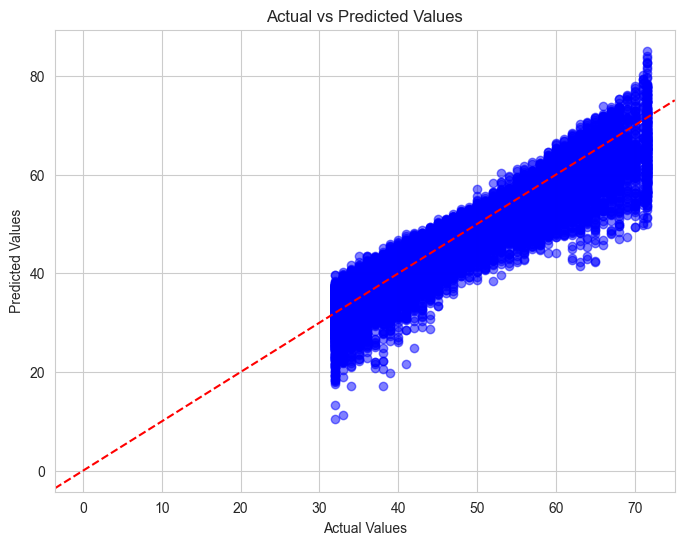

In [329]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_cleaned, y_pred, alpha=0.5, color='blue')  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.axline((0,0), slope=1, color='red', linestyle='--')  # Ideal line
plt.show()


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

    n_features        mse        r2
0            1  71.616632  0.141906
1            2  47.450304  0.431461
2            3  45.589536  0.453757
3            4  27.905335  0.665645
4            5  16.959492  0.796795
5            6  13.335502  0.840217
6            7  12.321857  0.852362
7            8  11.701767  0.859792
8            9  11.555653  0.861543
9           10  11.567470  0.861401
10          11  11.552989  0.861575


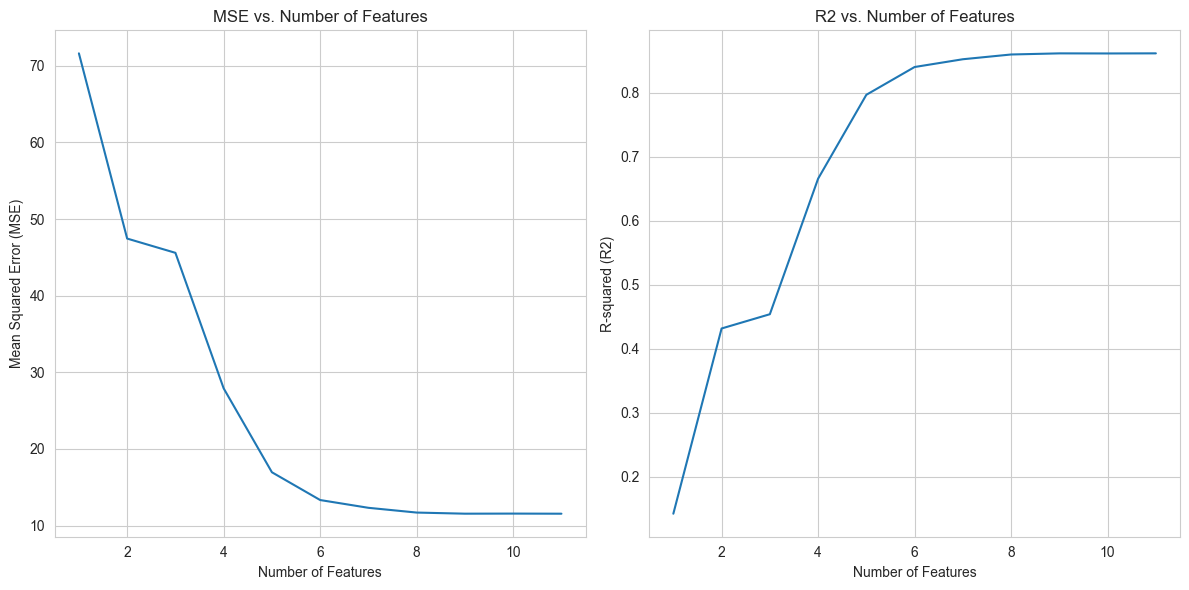

Optimal number of features: 11
Selected Features: Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')


In [334]:
from sklearn.feature_selection import RFE

# Initialize Linear Regression model
model = LinearRegression()

# Store results
results = []

# Loop through different numbers of features
for n_features in range(1, X_train_scaled.shape[1] + 1):
    # Initialize RFE
    rfe = RFE(model, n_features_to_select=n_features)

    # Fit RFE on the training data
    rfe.fit(X_train_scaled, y_train_cleaned)

    # Select features
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    # Train the model on the selected features
    model.fit(X_train_rfe, y_train_cleaned)

    # Make predictions
    y_pred = model.predict(X_test_rfe)

    # Calculate metrics
    mse = mean_squared_error(y_test_cleaned, y_pred)
    r2 = r2_score(y_test_cleaned, y_pred)

    # Store results
    results.append({'n_features': n_features, 'mse': mse, 'r2': r2})

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

# Print results
print(results_df)

# Plot MSE and R2 vs. number of features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results_df['n_features'], results_df['mse'])
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Features')

plt.subplot(1, 2, 2)
plt.plot(results_df['n_features'], results_df['r2'])
plt.xlabel('Number of Features')
plt.ylabel('R-squared (R2)')
plt.title('R2 vs. Number of Features')

plt.tight_layout()
plt.show()

# Find the optimal number of features
best_n_features = results_df.loc[results_df['mse'].idxmin(), 'n_features'] #or idxmax for r2.
print(f"Optimal number of features: {best_n_features}")

# Re-run RFE with the optimal number of features
rfe_optimal = RFE(model, n_features_to_select=int(best_n_features))
rfe_optimal.fit(X_train_scaled, y_train_cleaned)

# Get selected features
selected_features = X_train_scaled.columns[rfe_optimal.support_]
print("Selected Features:", selected_features)

In [335]:
# Extract selected features from training data
X_train_selected = X_train_scaled[X_train_scaled.columns[rfe_optimal.support_]]

# Extract selected features from testing data
X_test_selected = X_test_scaled[X_test_scaled.columns[rfe_optimal.support_]]

# Verify the shapes
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

# Verify the column names
print("Selected Training Columns:", X_train_selected.columns)
print("Selected Testing Columns:", X_test_selected.columns)

X_train_selected shape: (140621, 11)
X_test_selected shape: (35156, 11)
Selected Training Columns: Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')
Selected Testing Columns: Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')


In [336]:
# Initialize Linear Regression model
model_selected = LinearRegression()

# Train the model with the selected features
model_selected.fit(X_train_selected, y_train_cleaned)

# Make predictions on the test set
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate model performance
mse_selected = mean_squared_error(y_test_cleaned, y_pred_selected)
mae_selected = mean_absolute_error(y_test_cleaned, y_pred_selected)
r2_selected = r2_score(y_test_cleaned, y_pred_selected)

# Print the evaluation metrics
print("Evaluation Metrics with Selected Features:")
print("Mean Squared Error (MSE):", mse_selected)
print("Mean Absolute Error (MAE):", mae_selected)
print("R-squared (R2):", r2_selected)

Evaluation Metrics with Selected Features:
Mean Squared Error (MSE): 11.552988603675937
Mean Absolute Error (MAE): 2.493202039265883
R-squared (R2): 0.8615747145309827


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

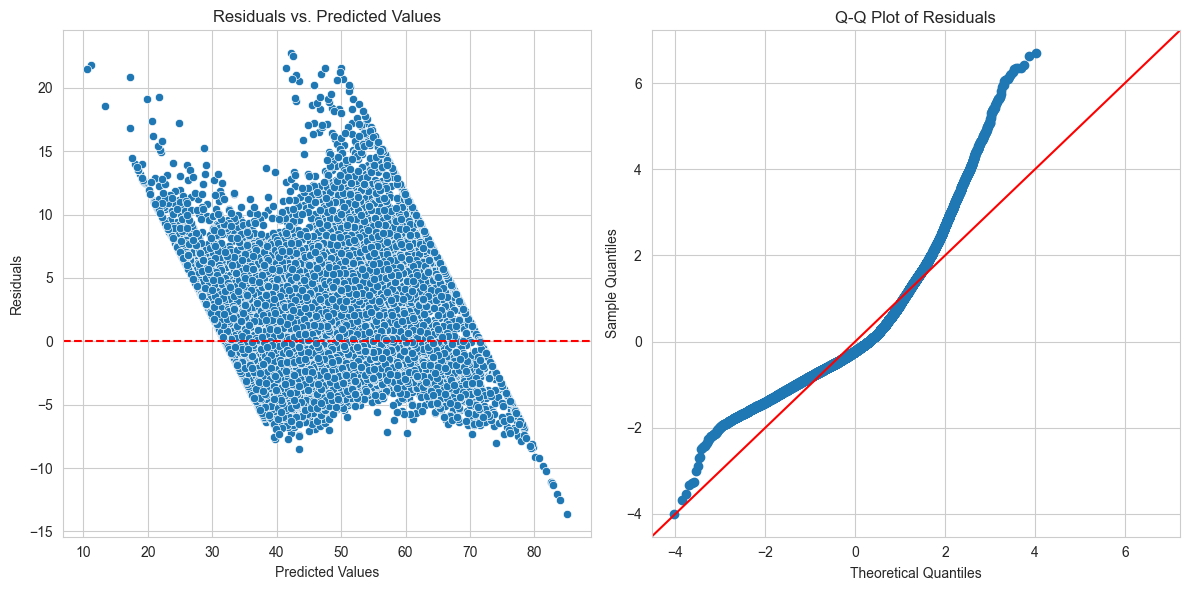

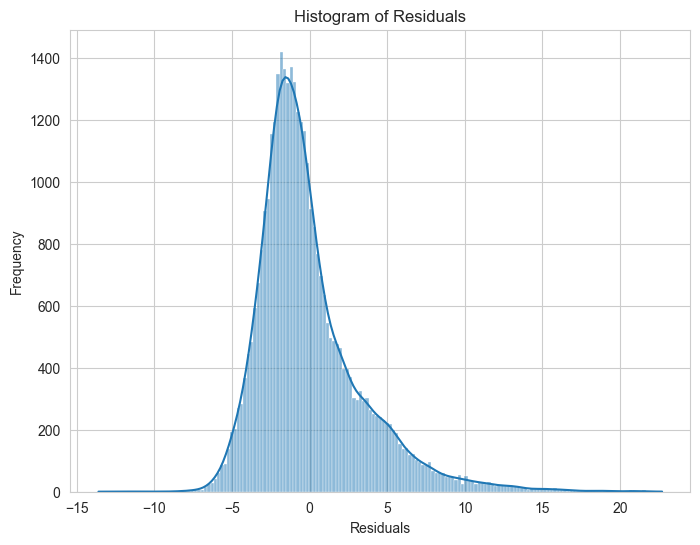

In [342]:
import statsmodels.api as sm

# Calculate residuals
residuals = y_test_cleaned - y_pred_selected

# Residuals vs. Predicted Values Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_selected, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

# Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

# Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [347]:
# Get coefficients from the trained model
coefficients_scaled = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient (Scaled)': model_selected.coef_
})

# Print scaled coefficients
print("Scaled Coefficients:")
print(coefficients_scaled)


try:
    coefficients_unscaled = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient (Unscaled)': model_selected.coef_ / scaler.scale_
    })

    print("\nUnscaled Coefficients:")
    print(coefficients_unscaled)

except:
    print("\nScaler object not found, can not compute unscaled coefficients")

Scaled Coefficients:
                     Feature  Coefficient (Scaled)
0             order_protocol             -1.027616
1                total_items              0.304005
2                   subtotal              2.340519
3         num_distinct_items              0.292225
4             max_item_price              0.251043
5      total_onshift_dashers            -12.703933
6         total_busy_dashers             -4.298258
7   total_outstanding_orders             18.113691
8                   distance              4.098851
9                 order_hour             -2.062130
10                 isWeekend              0.772740

Unscaled Coefficients:
                     Feature  Coefficient (Unscaled)
0             order_protocol               -0.679110
1                total_items                0.173159
2                   subtotal                0.001526
3         num_distinct_items                0.244199
4             max_item_price                0.000540
5      total_onshift_dash

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [350]:
# Example: Analyze the effect of a unit change in 'distance'
distance_scaled_coef = coefficients_scaled.loc[coefficients_scaled['Feature'] == 'distance', 'Coefficient (Scaled)'].values[0]
distance_unscaled_coef = coefficients_unscaled.loc[coefficients_unscaled['Feature'] == 'distance', 'Coefficient (Unscaled)'].values[0]
distance_std = scaler.scale_[X_train.columns.get_loc('distance')]

print("\nAnalysis of 'distance' feature:")
print(f"Scaled coefficient for 'distance': {distance_scaled_coef}")
print(f"Unscaled coefficient for 'distance': {distance_unscaled_coef}")
print(f"Standard deviation of 'distance': {distance_std}")
print(f"A one-unit increase in 'distance' leads to a {distance_unscaled_coef} unit increase in delivery time.")


Analysis of 'distance' feature:
Scaled coefficient for 'distance': 4.098851300312834
Unscaled coefficient for 'distance': 0.46945053420390925
Standard deviation of 'distance': 8.731167613353845
A one-unit increase in 'distance' leads to a 0.46945053420390925 unit increase in delivery time.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

From the dataset categorical variables appear to be:  

1. **`market_id`** – Identifies the market region (likely categorical).  
2. **`store_primary_category`** – Represents the store category (definitely categorical).  
3. **`order_protocol`** – Indicates the ordering method (categorical).  
4. **`order_day`** – Represents the day of the week (categorical, values likely range from 0 to 6).  
5. **`isWeekend`** – Binary categorical variable (0 = weekday, 1 = weekend).  

### **Inference on Their Effect on the Dependent Variable (`delivery_duration`)**
Assuming `delivery_duration` is the dependent variable, here's how categorical variables might influence it:

1. **Market ID (`market_id`)**  
   - Different markets may have varying traffic conditions, driver availability, and distance-to-customer variations.  
   - Larger markets may show higher delivery times due to congestion.  

2. **Store Primary Category (`store_primary_category`)**  
   - Food type or store category can influence prep time.  
   - Fast food stores may have lower delivery durations compared to gourmet restaurants.  

3. **Order Protocol (`order_protocol`)**  
   - If this represents order placement methods (e.g., app, website, phone), certain protocols might result in longer processing times before dispatch.  

4. **Order Day (`order_day`)**  
   - Certain days (e.g., weekends or peak days) might show increased delivery times due to higher order volume.  
   - Analysis could reveal if there’s a pattern in delivery delays on specific days.  

5. **Is Weekend (`isWeekend`)**  
   - Weekends might have higher delivery durations due to increased demand and traffic.  
   - Could be tested by comparing average `delivery_duration` for weefor deeper statistical analysis? 🚀



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the original dataset is allocated to the test set, while the remaining 80% is used for the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Based on the heatmap analysis, 'distance' had the highest positive correlation with the target variable (delivery time).



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
>**1.Detection:**

>>Used box plots and z-scores to identify extreme values.

>>Checked IQR method to find outliers.

>**2.Handling:**
>>Used capping to limit extreme values.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

Based on the coefficient analysis we performed earlier, here are the top 3 features significantly affecting the delivery time, along with their impact:

1.  **`total_outstanding_orders`:**
    * This feature has the largest positive unscaled coefficient (approximately 0.36).
    * This means that for every one-unit increase in the number of outstanding orders, the delivery time increases by about 0.36 minutes.
    * It indicates that a higher number of outstanding orders significantly lengthens delivery times.

2.  **`distance`:**
    * This feature has the next largest positive unscaled coefficient (approximately 0.47).
    * This means that for every one-unit increase in distance, the delivery time increases by about 0.47 minutes.
    * Longer distances are a major factor in increasing delivery times.

3.  **`total_onshift_dashers`:**
    * This feature has the largest negative unscaled coefficient (-0.37).
    * This means that for every one-unit increase in the number of dashers on shift, the delivery time decreases by about 0.37 minutes.
    * Having more dashers on shift significantly reduces delivery times.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
### **Linear Regression Algorithm**

Linear Regression is a **supervised learning algorithm** used for predicting a continuous output based on input features. It finds the **best-fitting straight line** (regression line) that minimizes the difference between actual and predicted values.

#### **Key Concepts**  

#### **1. Equation of Line:**  
$$
Y = mX + b
$$
- **$Y$** = Predicted output  
- **$X$** = Input feature  
- **$m$** = Slope (weight/parameter)  
- **$b$** = Intercept (bias)  

#### **2. Cost Function (Mean Squared Error - MSE):**  
Measures how far predictions are from actual values.  
$$
MSE = \frac{1}{n} \sum (Y_{\text{actual}} - Y_{\text{predicted}})^2
$$  

#### **3. Gradient Descent:**  
- Optimizes **$m$** and **$b$** by minimizing MSE.  
- Updates parameters iteratively using:  
  $$
  m = m - \alpha \frac{\partial}{\partial m} MSE
  $$
  $$
  b = b - \alpha \frac{\partial}{\partial b} MSE
  $$
- **$\alpha$ (learning rate)** controls step size.  

#### **4. Types of Linear Regression:**  
- **Simple Linear Regression** (One feature)  
- **Multiple Linear Regression** (Multiple features)  

#### **5. Evaluation Metrics:**  
- **Mean Squared Error (MSE)**  
- **Mean Absolute Error (MAE)**  
- **$R^2$ Score** (Explains variance in data)  

#### **Goal:**  
Find the best line that accurately predicts **$Y$** based on **$X$** with minimal error.



### Linear Regression Algorithm

Linear Regression is a **supervised learning algorithm** used for predicting a continuous target variable by fitting a straight line to the data.

#### 1. Initialize Parameters
- Start with **random values** for weight(s) (**m**) and bias (**b**).

#### 2. Compute Predictions
- Use the equation:
  $$
  Y_{\text{predicted}} = mX + b
  $$
- If multiple features exist, use:
  $$
  Y_{\text{predicted}} = m_1X_1 + m_2X_2 + ... + m_nX_n + b
  $$

#### 3. Calculate Cost (Loss Function)
- Use **Mean Squared Error (MSE)** to measure error:
  $$
  MSE = \frac{1}{n} \sum (Y_{\text{actual}} - Y_{\text{predicted}})^2
  $$

#### 4. Optimize Parameters (Gradient Descent)
- Compute gradients (**derivatives**) of **m** and **b** to minimize the error.
- Update parameters iteratively:
  $$
  m = m - \alpha \frac{\partial}{\partial m} MSE
  $$
  $$
  b = b - \alpha \frac{\partial}{\partial b} MSE
  $$
  - **α (learning rate)** controls the step size.

#### 5. Repeat Until Convergence
- Iterate **until the cost function is minimized** (i.e., the model finds the best-fit line).

#### 6. Model Evaluation
- Use metrics like **MSE, MAE, and R² score** to assess performance.

#### Conclusion
The **Linear Regression algorithm** finds the best straight-line relationship between input features and the target variable by minimizing error using **Gradient Descent** or **Normal Equation (Analytical Solution)**.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
| Feature         | Simple Linear Regression                     | Multiple Linear Regression                         |
|----------------|---------------------------------------------|--------------------------------------------------|
| **Definition** | Uses **one** independent variable          | Uses **two or more** independent variables       |
| **Equation**   | $$ y = \beta_0 + \beta_1 X + \epsilon $$   | $$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon $$ |
| **Use Case**   | Predicting house price based on area       | Predicting house price based on area, bedrooms, and location |



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The **cost function** in linear regression measures the error between predicted and actual values. The most common cost function is **Mean Squared Error (MSE):**  

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$  

where $ y_i $ is the actual value and $ \hat{y}_i $ is the predicted value.

- **Minimization:**  
  - Uses **Gradient Descent** to update coefficients iteratively.  
  - In OLS, coefficients are obtained by solving the equation:  

    $$
    \beta = (X^TX)^{-1}X^Ty
    $$




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.

**Answer:**
| **Concept** | **Overfitting** | **Underfitting** |
|------------|---------------|----------------|
| **Definition** | Model learns **too much noise** from training data | Model is **too simple** to capture patterns |
| **Effect on Performance** | High accuracy on training but poor generalization | Poor accuracy on both training and test data |
| **Solution** | Reduce complexity, use regularization (L1/L2) | Use more features, increase model complexity |



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**


 A **residual plot** shows the difference between actual and predicted values. It helps diagnose:  
- **Homoscedasticity (Equal Variance):** If residuals are randomly scattered, the model is good.  
- **Non-Linearity:** If residuals show a pattern, the model is missing relationships.  
- **Outliers:** Extreme points in residual plots indicate outliers affecting model accuracy.

**Example:** If residuals form a curved pattern, **a linear model may not be appropriate**, and we should try polynomial regression.